In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import datetime
import warnings
from jupyterthemes import jtplot

In [7]:
from ali.ali_sw import *
from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *

In [8]:
jtplot.style('default', grid=False)
plt.rcParams['errorbar.capsize'] = 4

## Import data

In [9]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_ox/*/*.xy'
files = glob.glob(path, recursive=True)
files.sort()
files

['/Users/pabloherrero/sabat/xps_spectra/ITO_ox/0_2020_01_15_ITO_untreated/20200115_ITO_untreated.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_ox/1_ITO_sputter_0.8kev/20200116_ITO_sputter_0.8kev.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_ox/2_ITO_sputter_anneal_300/20200116_ITO_sputter_anneal_300.xy',
 "/Users/pabloherrero/sabat/xps_spectra/ITO_ox/3_ITO_sputter_anneal_plasma_15'/20200117_ITO_sputter_anneal_plasma_15.xy",
 "/Users/pabloherrero/sabat/xps_spectra/ITO_ox/4_ITO_sputter_anneal_plasma_120'/20200117_ITO_sputter_anneal_plasma_120'.xy",
 "/Users/pabloherrero/sabat/xps_spectra/ITO_ox/5_ITO_sputter_anneal_plasma_150'/20200121_ITO_sputter_anneal_plasma_150'.xy",
 '/Users/pabloherrero/sabat/xps_spectra/ITO_ox/6_ITO_sputter_anneal_plasma_10h/20200123_ITO_sputter_anneal_plasma_10h.xy']

In [10]:
names = ['exsitu', 'sputt', 'anneal', 'plasma15min', 'plasma2h', 'plasma2.5h']
label = [ 'Ex-situ cleaning', 'Sputtering 2 min, 0.5 kV', 'Anneal 30 min, 300ºC', 'Plasma oxidation 15 min, 1e-3 mbar',
         'Plasma oxidation 2h, 1e-3 mbar', 'Plasma oxidation 2h 30 min, 1e-3 mbar']
experiments = [xps_data_import(path=f, name=n, label=l) for f,n,l in zip(files, names, label)]
experiments[0].name

'exsitu'

In [68]:
#experiments[6].dfx.rename(columns={'overview' :'overview_'}, inplace=True)
#experiments[7].dfx.rename(columns={'overview' :'overview_'}, inplace=True)

# Pre-treatment

## Substract all backgrounds 

### In 

In [11]:
region = 'In3d5/2'

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


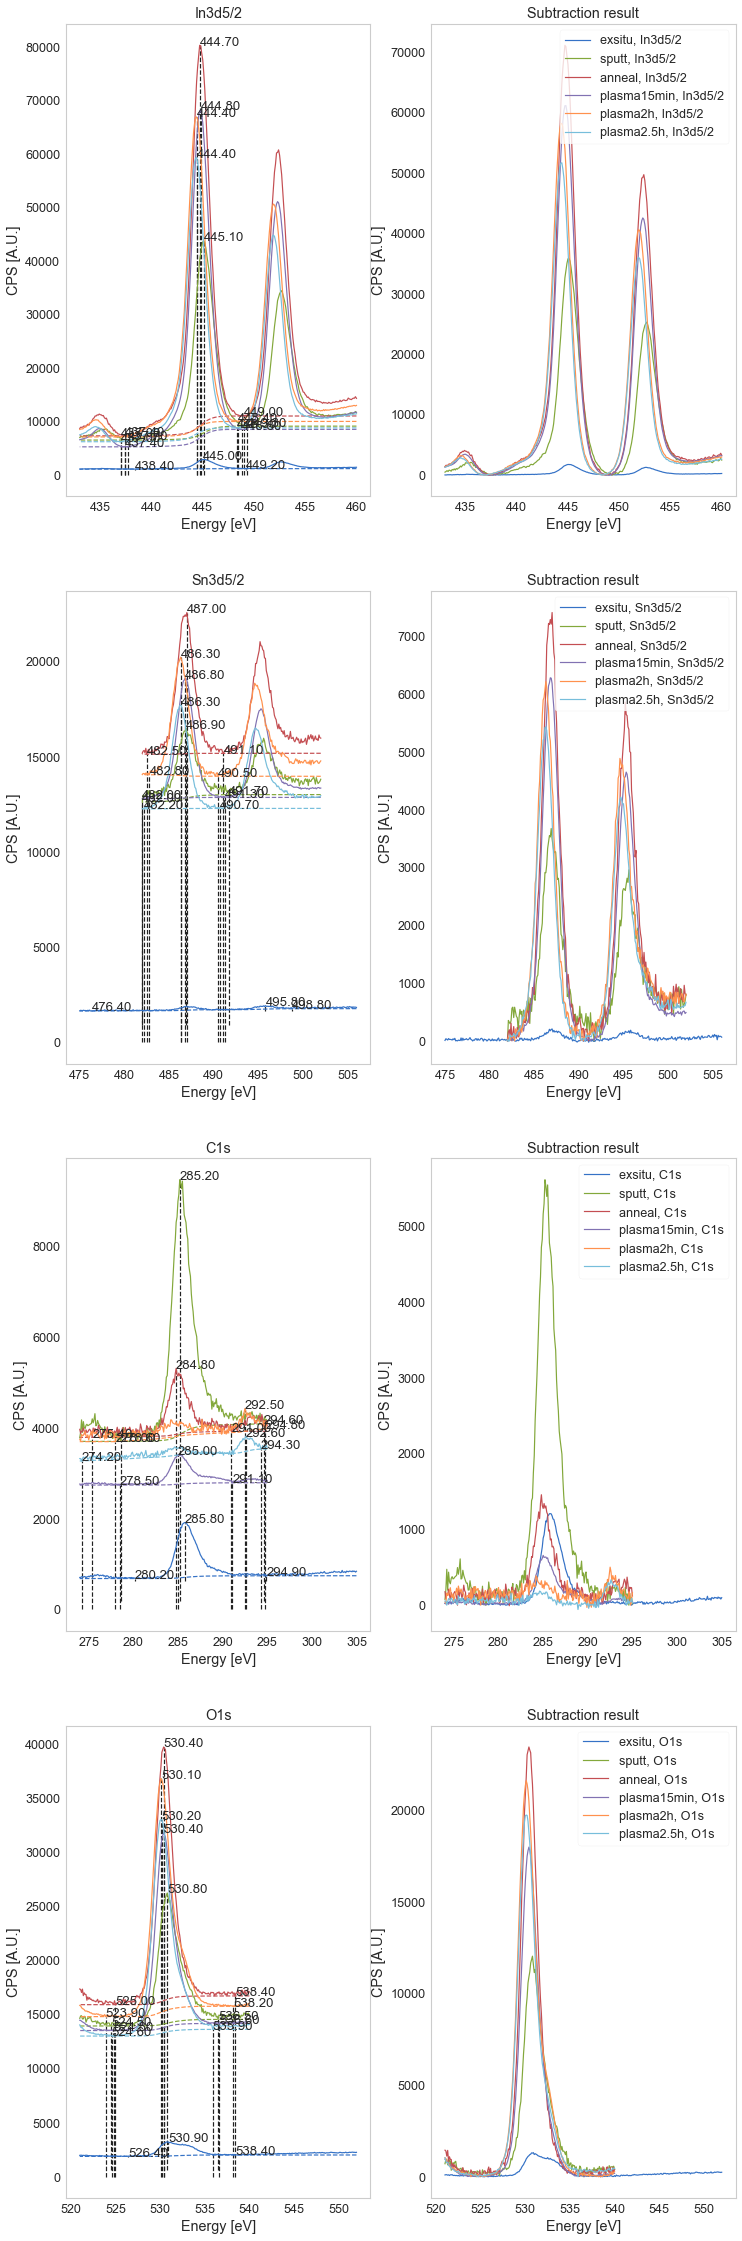

In [7]:
regions = ['In3d5/2', 'Sn3d5/2', 'C1s', 'O1s']
bg_exps = bulk_bg_subtract(experiments, regions)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Max iterations exceeded, subtract linear baseline


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


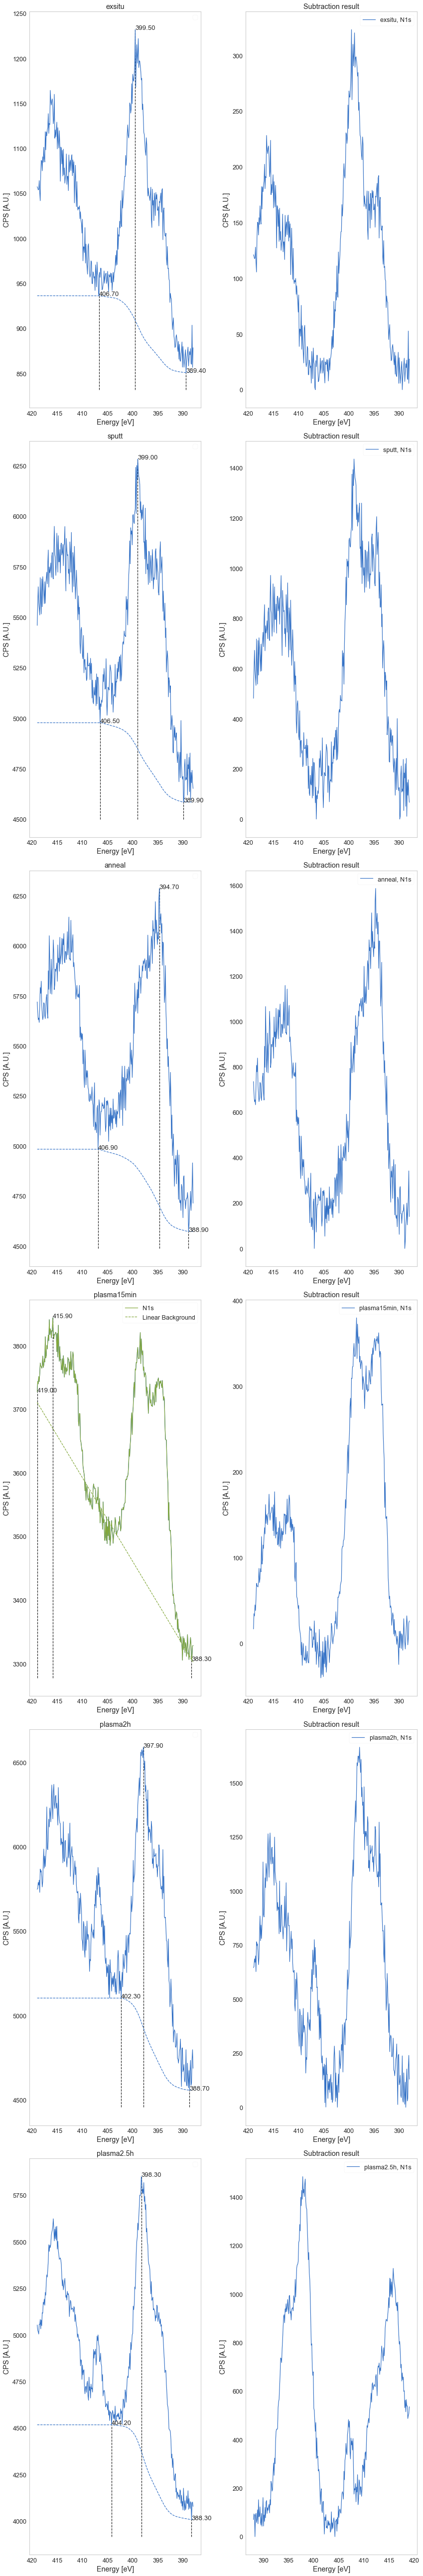

In [8]:
bg_exps = region_bg_subtract(bg_exps, 'N1s')

## Find hard shift and scaling factor in substrate (ref)

In [10]:
region = 'In3d5/2'

#### Apply Shift and scaling factor to all region for each experiment

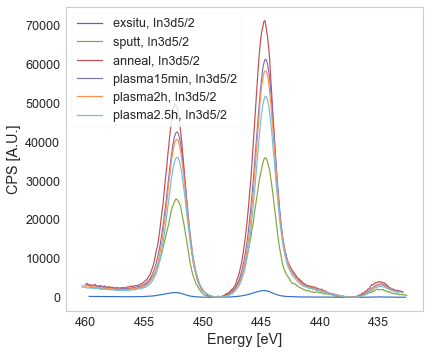

In [11]:
shifted_exps = []
for xp in bg_exps:
    shift = find_shift(xp, bg_exps[2], region = region)
    xp_sh = align_dfx(xp, shift)
    plot_region(xp_sh, region)
    shifted_exps.append(xp_sh)
cosmetics_plot()

In [12]:
for xp in shifted_exps:
    shift = find_shift(xp, bg_exps[2], region = region)
    assert shift == 0

## Scale spectra

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


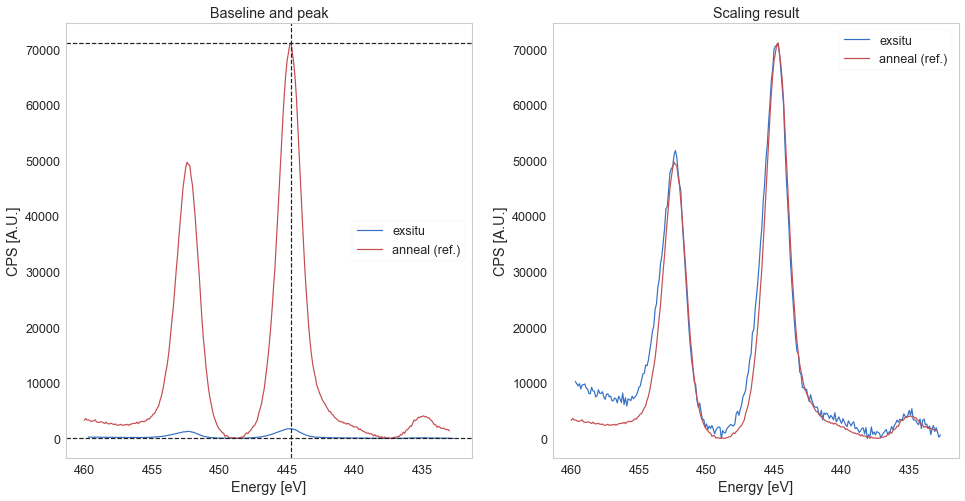

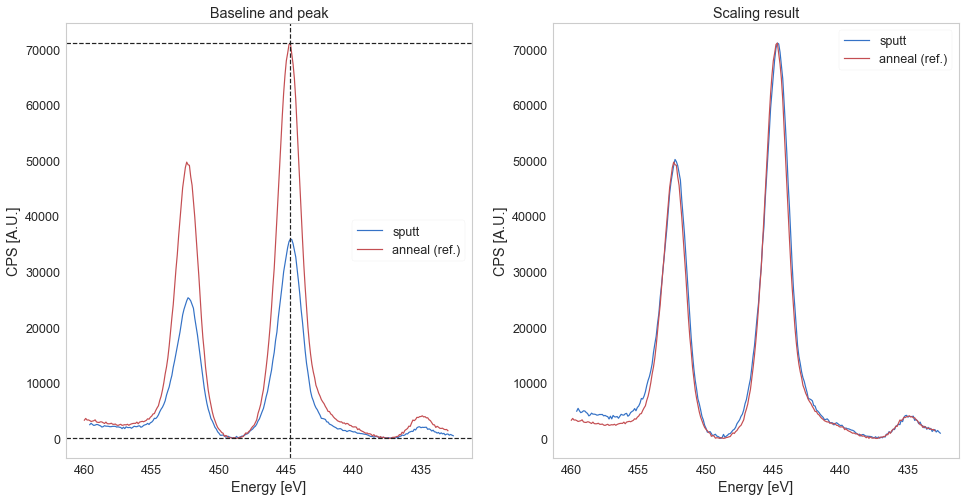

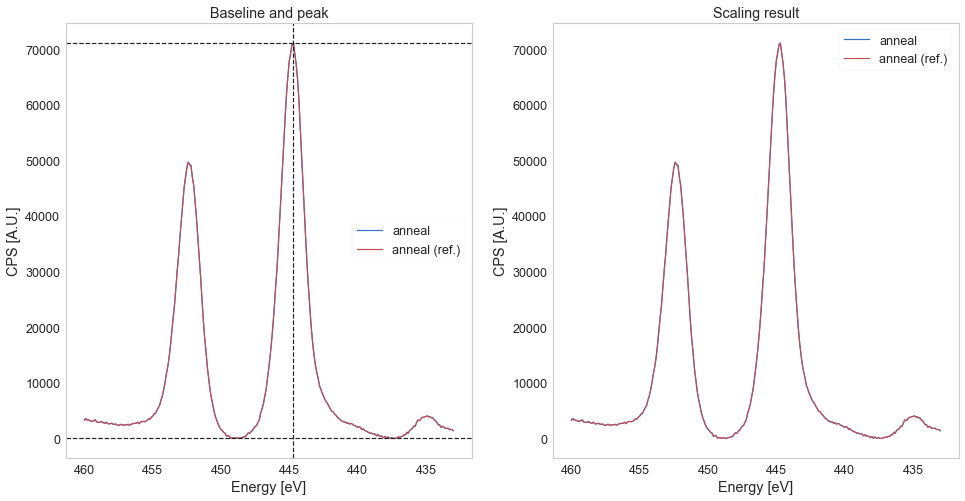

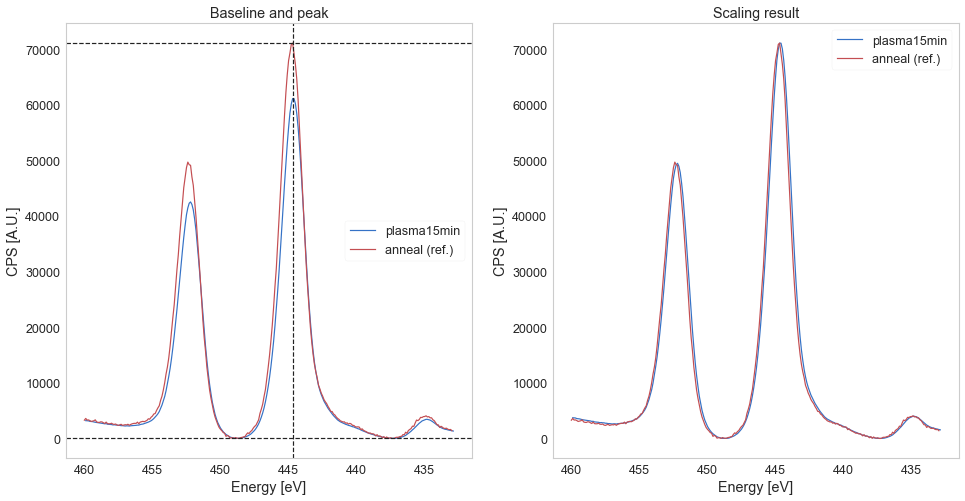

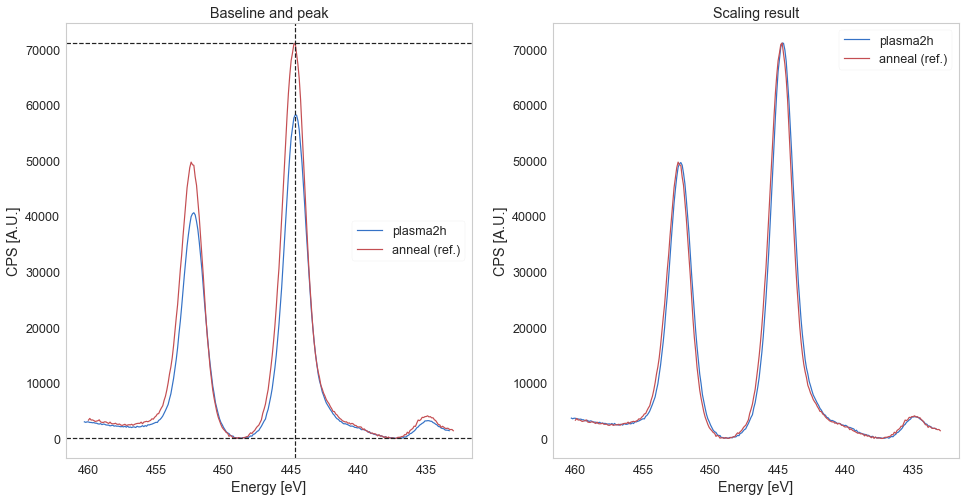

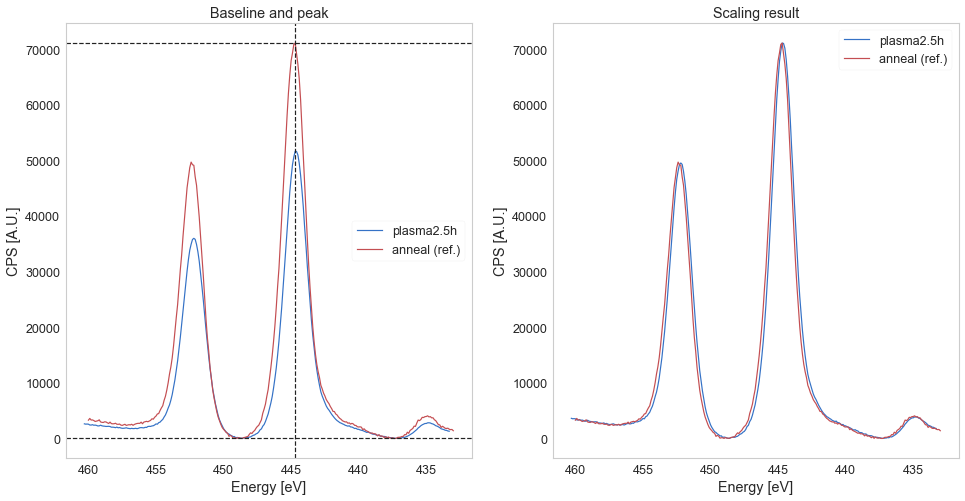

In [13]:
scaled_exps = []
for xp in shifted_exps:
    scale = scale_and_plot_spectra(xp = xp, xpRef = shifted_exps[2], region = 'In3d5/2')
    scaled_exps.append(scale_dfx(xp = xp, scale_factor = scale))

### Check scaling in remaining regions

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'Before processing')

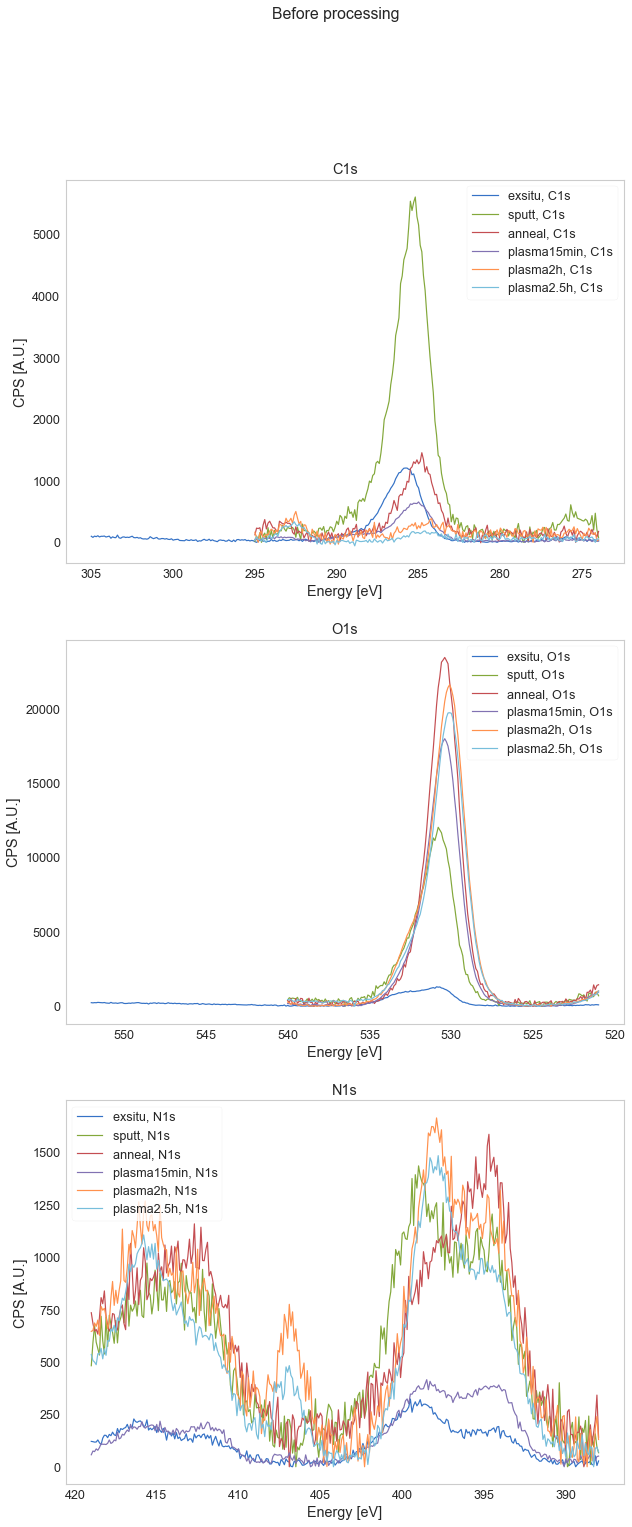

In [23]:
regions = ['C1s', 'O1s', 'N1s']
fig, ax = plt.subplots(len(regions), figsize=(10, 8 * len(regions)))
for i, r in enumerate(regions):
    for xp in bg_exps:
        plot_region(xp, r, ax=ax[i])
    cosmetics_plot(ax = ax[i])
    ax[i].set_title(r)
plt.suptitle('Before processing')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'After shifting and scaling')

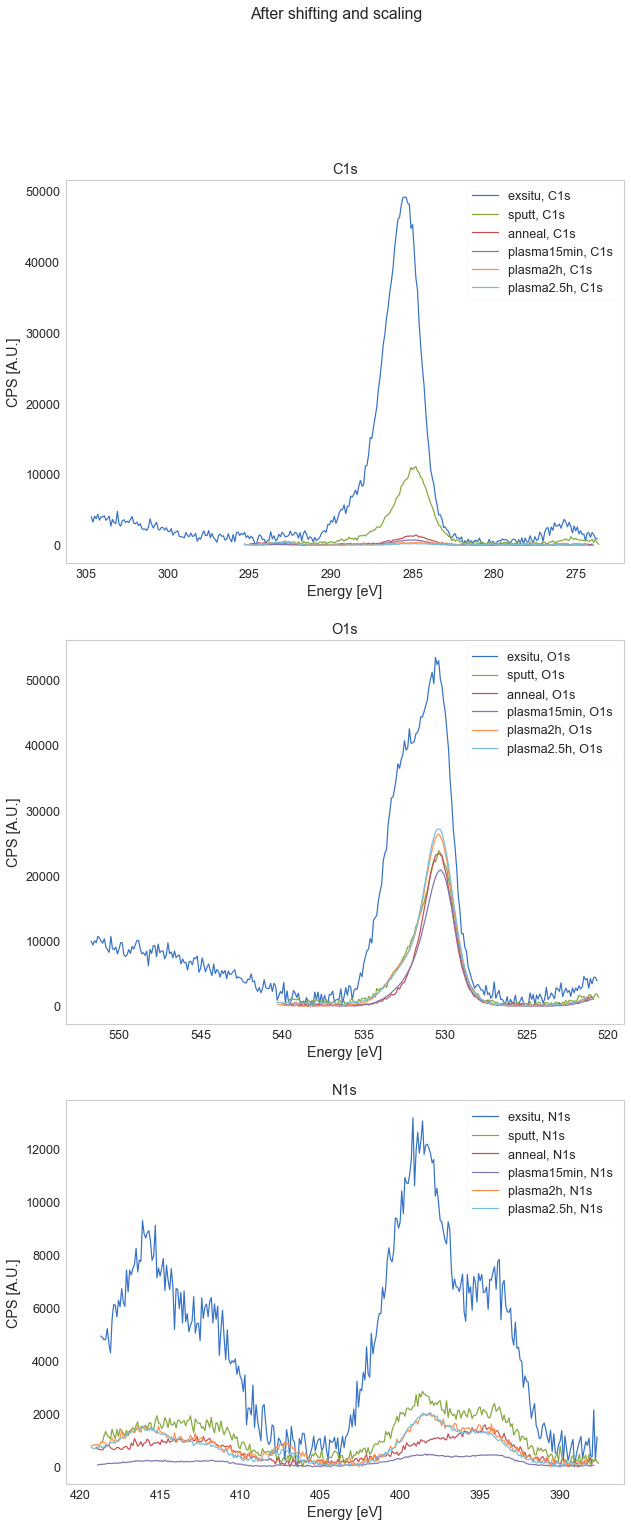

In [24]:
regions = ['C1s', 'O1s', 'N1s']
fig, ax = plt.subplots(len(regions), figsize=(10, 8 * len(regions)))
for i, r in enumerate(regions):
    for xp in scaled_exps:
        plot_region(xp, r, ax=ax[i])
    cosmetics_plot(ax = ax[i])
    ax[i].set_title(r)
plt.suptitle('After shifting and scaling')

## Store treated spectra group

In [25]:
import os
for xp in scaled_exps:
    filepath, filename = os.path.split(xp.path)
    newpath = filepath + '/proc/'
    try:
        os.mkdir(newpath)
    except FileExistsError: pass
    
    write_processed_xp(newpath + filename, xp)

# Integrate areas 

## In 3d

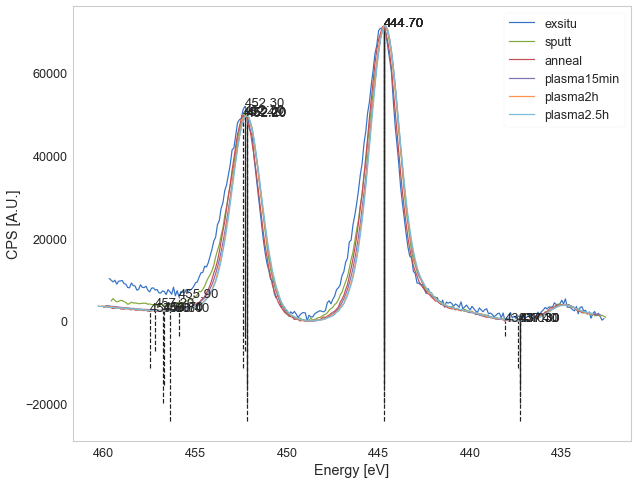

In [30]:
region = 'In3d5/2'
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(scaled_exps):
    ind.append(flexible_integration_limits(xp, region, doublePeak=-1))
cosmetics_plot()

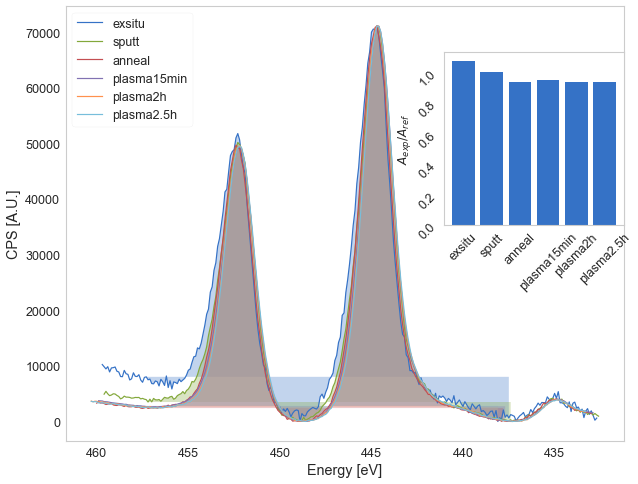

In [31]:
plt.figure(figsize=(10,8))
area_rel, names = [], []
area_in = []
for j,xp in enumerate(scaled_exps):
    area = compare_areas(scaled_exps[1], xp, region, lmidx=ind[1][2], rmidx=ind[1][3])
    area_rel.append(area[0])
    area_in.append(area[1])
    names.append(xp.name)
# plt.xlim(805, 760)
cosmetics_plot()
inset_rel_areas(area_rel, names)

##  Sn 3d

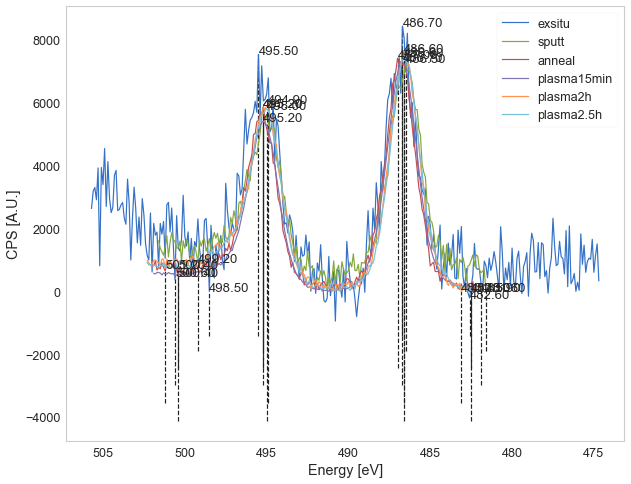

In [32]:
region = 'Sn3d5/2'
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(scaled_exps):
    ind.append(flexible_integration_limits(xp, region, doublePeak=-1))
cosmetics_plot()

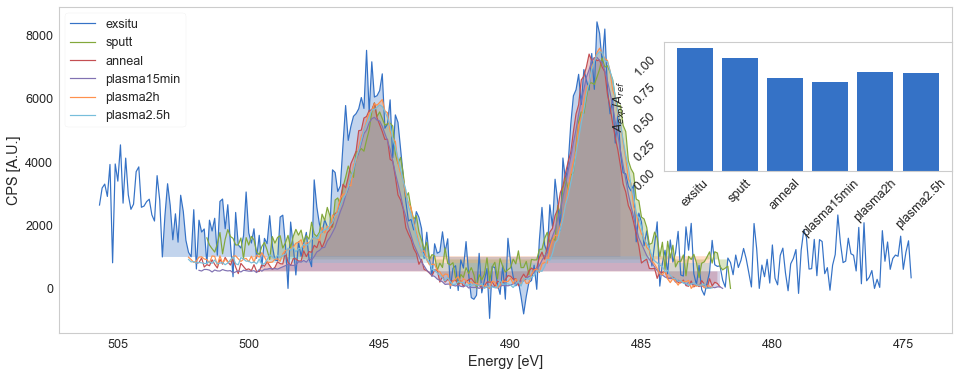

In [33]:
plt.figure(figsize=(16,6))
area_rel, names = [], []
area_sn = []
for j,xp in enumerate(scaled_exps):
    area = compare_areas(scaled_exps[1], xp, region, lmidx=ind[1][2], rmidx=ind[1][3])
    area_rel.append(area[0])
    area_sn.append(area[1])
    names.append(xp.name)
# plt.xlim(805, 760)
cosmetics_plot()
inset_rel_areas(area_rel, names)

## C1s 

In [46]:
e0 = scaled_exps[1].dfx[region].energy.head(1)
indrop = np.where(scaled_exps[0].dfx[region].energy.values > e0.values)[0]
scaled_exps[0].dfx[region] = scaled_exps[0].dfx[region].dropna().drop(indrop).reset_index(drop=True)

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


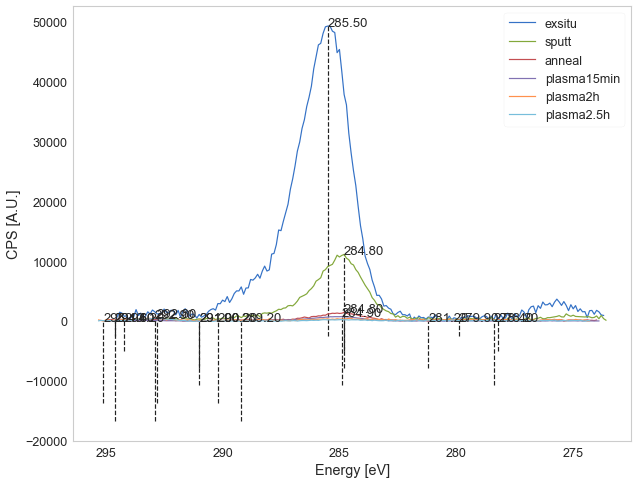

In [48]:
region = 'C1s'
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(scaled_exps):
    ind.append(flexible_integration_limits(xp, region, doublePeak=0))
cosmetics_plot()

In [47]:
scaled_exps[0].dfx[region]

energy       counts
0     294.6     0.000000
1     294.5   783.541273
2     294.4  1486.753001
3     294.3  1315.079073
4     294.2   794.882220
5     294.1   861.485326
6     294.0   258.923191
7     293.9   667.443669
8     293.8   733.837071
9     293.7  1915.797651
10    293.6   923.199778
11    293.5  1332.813340
12    293.4   687.496989
13    293.3   808.335841
14    293.2  1549.677045
15    293.1  1203.986649
16    293.0  1848.036247
17    292.9  1551.808139
18    292.8  1178.914819
19    292.7  1251.590983
20    292.6  1384.240720
21    292.5  2012.263563
22    292.4  1438.801086
23    292.3  1468.375100
24    292.2  1824.473310
25    292.1  1686.002662
26    292.0  1041.267085
27    291.9  1793.874237
28    291.8   626.955725
29    291.7  1629.178888
..      ...          ...
281     NaN          NaN
282     NaN          NaN
283     NaN          NaN
284     NaN          NaN
285     NaN          NaN
286     NaN          NaN
287     NaN          NaN
288     NaN          NaN
289     NaN          NaN
290     NaN          NaN
291     NaN          NaN
292     NaN          NaN
293     NaN          NaN
294     NaN          NaN
295     NaN          NaN
296     NaN          NaN
297     NaN          NaN
298     NaN          NaN
299     NaN          NaN
300     NaN          NaN
301     NaN          NaN
302     NaN          NaN
303     NaN          NaN
304     NaN          NaN
305     NaN          NaN
306     NaN          NaN
307     NaN          NaN
308     NaN          NaN
309     NaN          NaN
310     NaN          NaN

[311 rows x 2 columns]

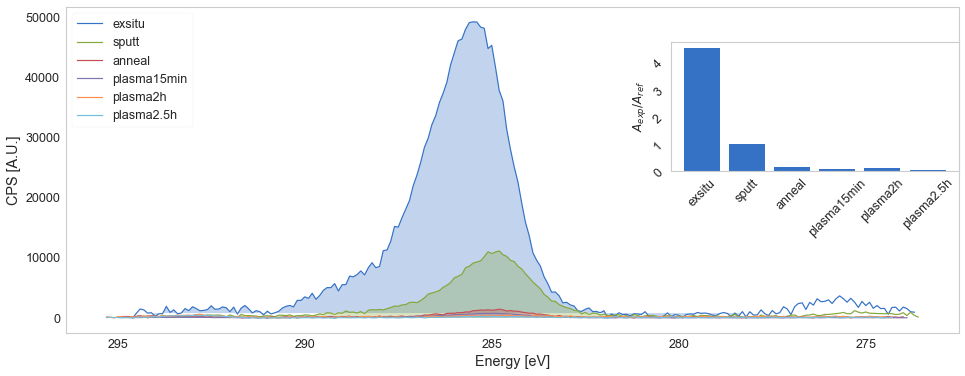

In [49]:
plt.figure(figsize=(16,6))
area_rel, names = [], []
area_c = []
for j,xp in enumerate(scaled_exps):
    area = compare_areas(scaled_exps[1], xp, region, lmidx=ind[1][1], rmidx=ind[1][2])
    area_rel.append(area[0])
    area_c.append(area[1])
    names.append(xp.name)
# plt.xlim(805, 760)
cosmetics_plot()
inset_rel_areas(area_rel, names)

## O 1s

In [87]:
e0 = experiments[1].dfx[region].energy.head(1)
indrop = np.where(experiments[0].dfx[region].energy.values > e0.values)[0]
experiments[0].dfx[region] = experiments[0].dfx[region].drop(indrop)

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [53]:
e0 = scaled_exps[1].dfx[region].energy.head(1)
indrop = np.where(scaled_exps[0].dfx[region].energy.values > e0.values)[0]
scaled_exps[0].dfx[region] = scaled_exps[0].dfx[region].dropna().drop(indrop).reset_index(drop=True)

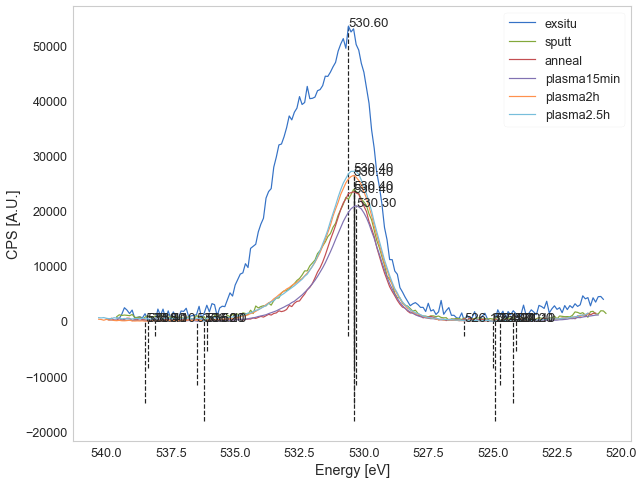

In [54]:
region = 'O1s'
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(scaled_exps):
    ind.append(flexible_integration_limits(xp, region, doublePeak=0))
cosmetics_plot()

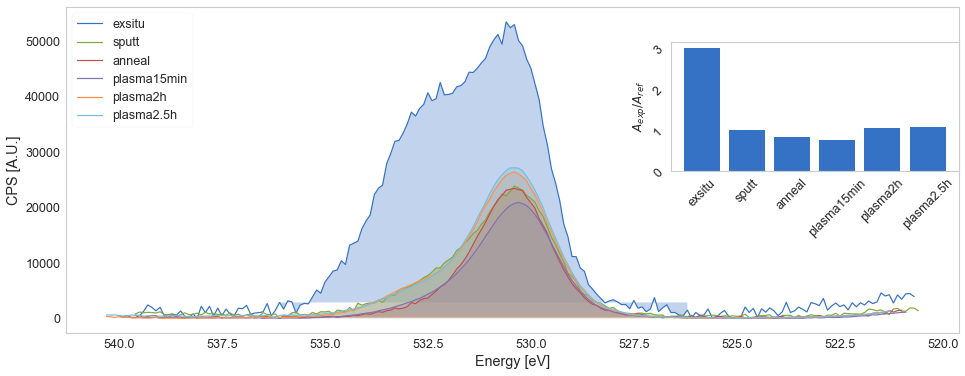

In [58]:
plt.figure(figsize=(16,6))
area_rel, names = [], []
area_o = []
for j,xp in enumerate(scaled_exps):
    area = compare_areas(scaled_exps[1], xp, region, lmidx=ind[1][1], rmidx=ind[0][2])
    area_rel.append(area[0])
    area_o.append(area[1])
    names.append(xp.name)
# plt.xlim(805, 760)
cosmetics_plot()
inset_rel_areas(area_rel, names)

## N 1s (not visible: Mo)

In [59]:
e0 = scaled_exps[1].dfx[region].energy.head(1)
indrop = np.where(scaled_exps[0].dfx[region].energy.values > e0.values)[0]
scaled_exps[0].dfx[region] = scaled_exps[0].dfx[region].dropna().drop(indrop).reset_index(drop=True)

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


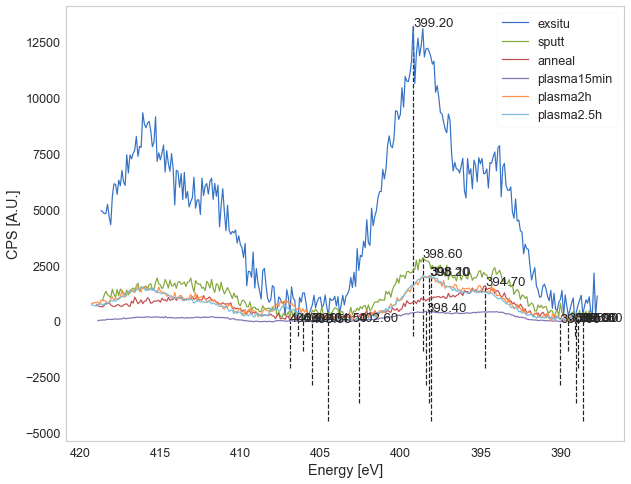

In [60]:
region = 'N1s'
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(scaled_exps):
    ind.append(flexible_integration_limits(xp, region, doublePeak=0))
cosmetics_plot()

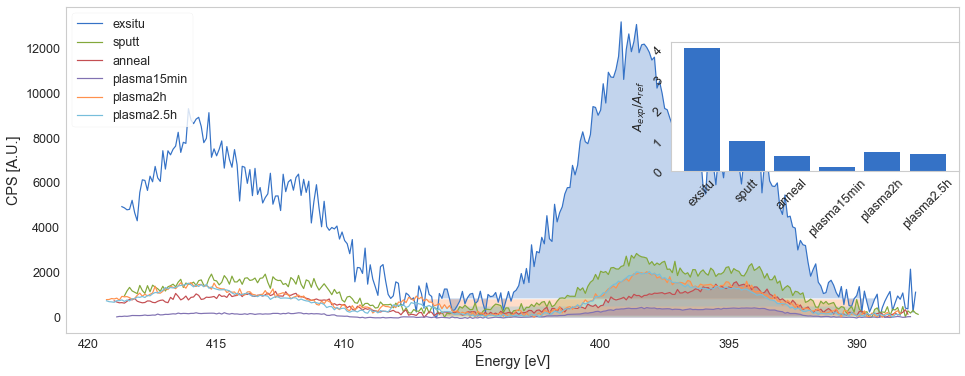

In [61]:
plt.figure(figsize=(16,6))
area_rel, names = [], []
area_n = []
for j,xp in enumerate(scaled_exps):
    area = compare_areas(scaled_exps[1], xp, region, lmidx=ind[1][1], rmidx=ind[0][2])
    area_rel.append(area[0])
    area_o.append(area[1])
    names.append(xp.name)
# plt.xlim(805, 760)
cosmetics_plot()
inset_rel_areas(area_rel, names)

# Stoichiometry (unscaled)

In [63]:
asf = dict({'C' : 0.296, 'O' : 0.711, 'N' : 0.477, 'In' : 4.359, 'Sn' : 4.725, 'Br' : 1.053})
print('Relative abundance | C/O | In/Sn | In/O | In/C | ')
for i in range(len(experiments)):
    print('| ', experiments[i].name, '| %.1f | %.1f | %.1f | %.1f |' %(area_c[i]*asf['O'] / (area_o[i]*asf['C'])  , 
          area_in[i]*asf['Sn'] / (area_sn[i]*asf['In']), 
          area_in[i]*asf['O'] / (area_o[i]*asf['In']) , 
          area_in[i]*asf['C'] / (area_c[i]*asf['In'])) )

Relative abundance | C/O | In/Sn | In/O | In/C | 
|  exsitu | 1.7 | 7.9 | 0.3 | 0.1 |
|  sputt | 1.1 | 8.0 | 0.7 | 0.6 |
|  anneal | 0.2 | 9.2 | 0.8 | 3.7 |
|  plasma15min | 0.1 | 9.7 | 0.9 | 7.1 |
|  plasma2h | 0.1 | 8.5 | 0.6 | 5.7 |
|  plasma2.5h | 0.1 | 8.7 | 0.6 | 10.5 |


# Fits -> position + FWHM

## O 1s

In [94]:
fitO = []
region = 'O1s'

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'O 1s')

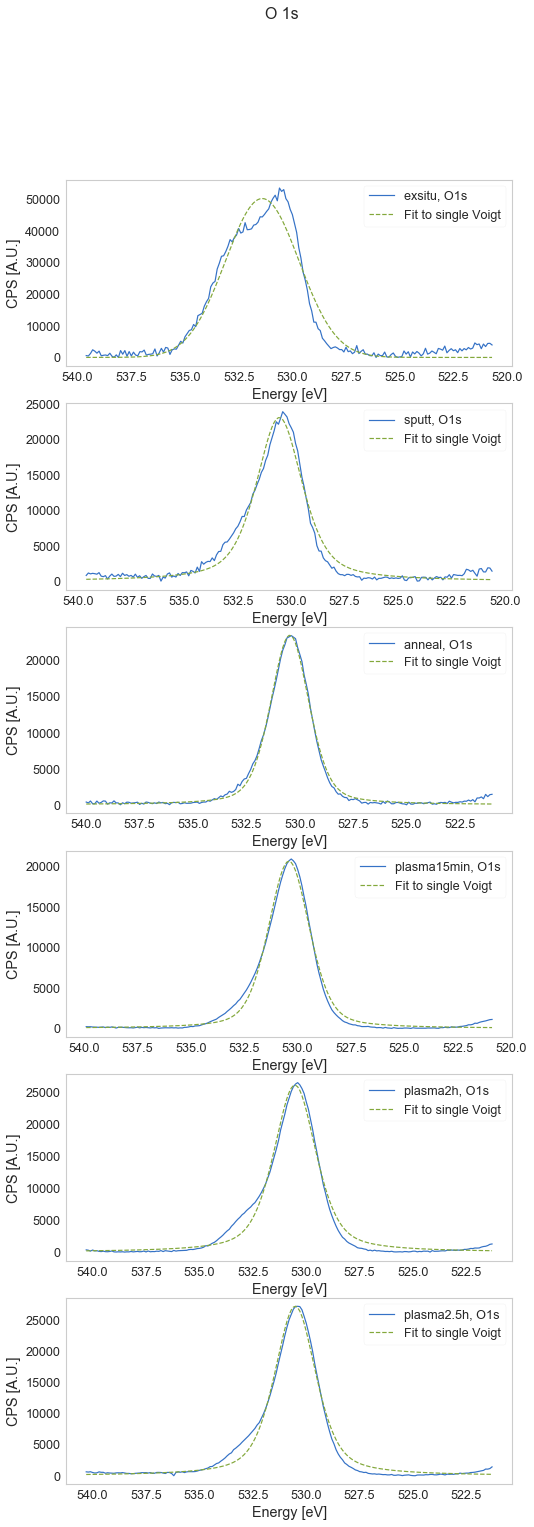

In [93]:
fitv = []
fig, ax = plt.subplots(len(experiments), figsize=(8,24))
for i, xp in enumerate(scaled_exps):
    fitv.append(fit_voigt(xp, region, ax = ax[i]))
    cosmetics_plot(ax = ax[i])
plt.suptitle('O 1s')

### Add shoulders

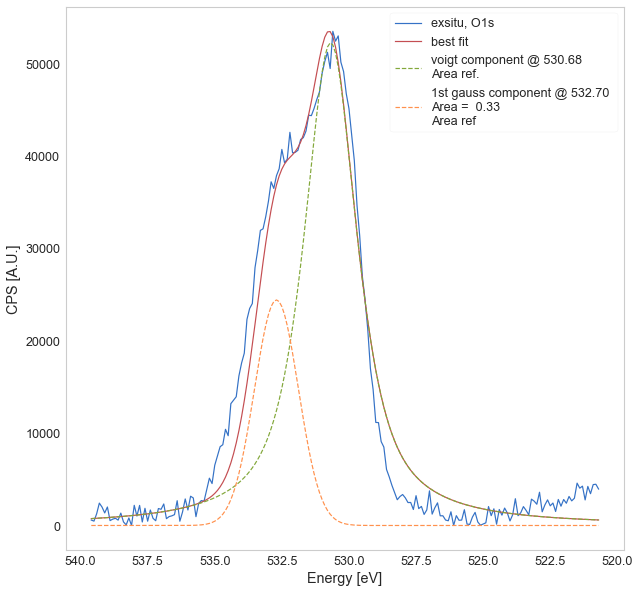

In [95]:
plt.figure(figsize=(10, 10))
par_g = [3.5e4, 532.5, 1]
bounds_g=[ (3e4, 5e4), (531, 532.7), (0.8, 2.8)]
fitvg = add_gauss_shoulder(scaled_exps[0], region, par_g, bounds_g, fitv[0])
fitO.append([fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']])
cosmetics_plot()

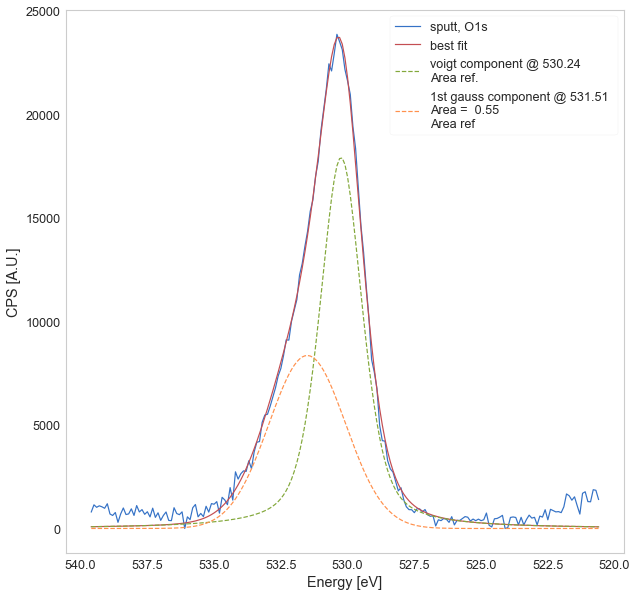

In [96]:
plt.figure(figsize=(10, 10))
par_g = [3.5e4, 532.5, 1]
bounds_g=[ (3e4, 5e4), (531, 532.7), (0.8, 2.8)]
fitvg = add_gauss_shoulder(scaled_exps[1], region, par_g, bounds_g, fitv[1])
fitO.append([fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']])
cosmetics_plot()

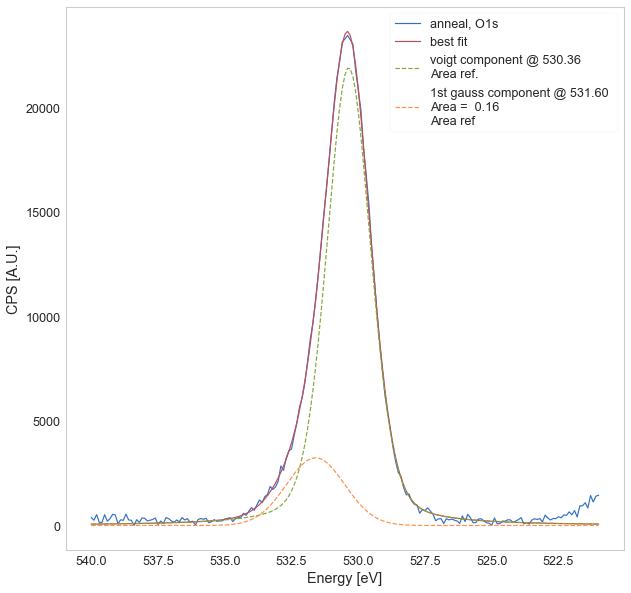

In [97]:
plt.figure(figsize=(10, 10))
par_g = [3.5e3, 532.5, 1]
bounds_g=[ (3e3, 5e4), (531, 532.7), (0.8, 2.8)]
fitvg = add_gauss_shoulder(scaled_exps[2], region, par_g, bounds_g, fitv[2])
fitO.append([fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']])
cosmetics_plot()

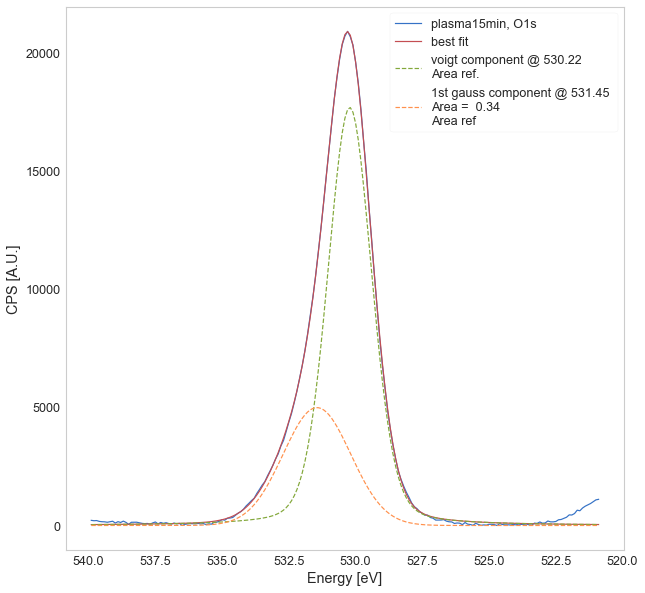

In [98]:
plt.figure(figsize=(10, 10))
par_g = [3.5e3, 532.5, 1]
bounds_g=[ (3e3, 5e4), (531, 532.7), (0.8, 2.8)]
fitvg = add_gauss_shoulder(scaled_exps[3], region, par_g, bounds_g, fitv[3])
fitO.append([fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']])
cosmetics_plot()

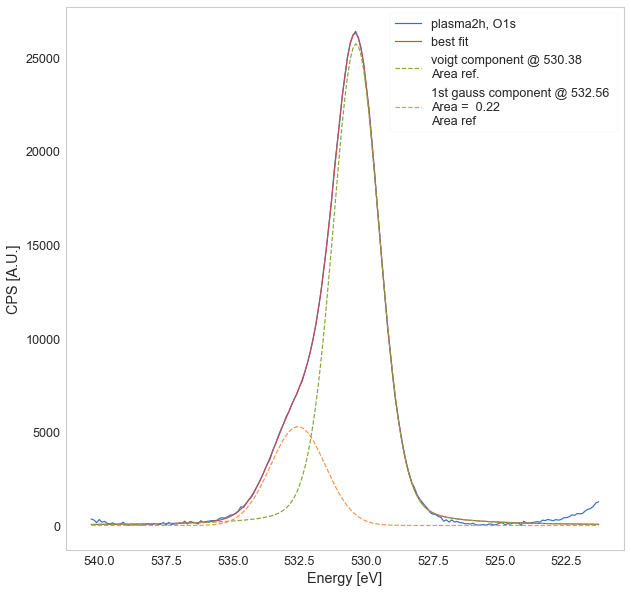

In [99]:
plt.figure(figsize=(10, 10))
par_g = [3.5e3, 532.5, 1]
bounds_g=[ (3e3, 5e4), (531, 532.7), (0.8, 2.8)]
fitvg = add_gauss_shoulder(scaled_exps[4], region, par_g, bounds_g, fitv[4])
fitO.append([fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']])
cosmetics_plot()

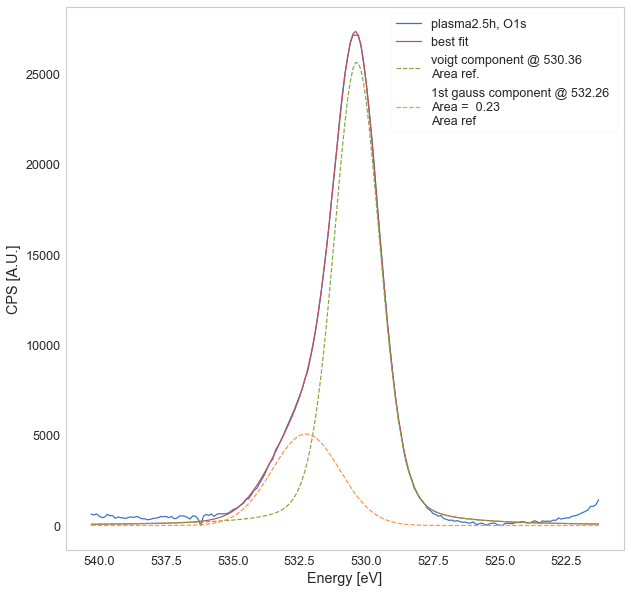

In [100]:
plt.figure(figsize=(10, 10))
par_g = [3.5e3, 532.5, 1]
bounds_g=[ (3e3, 5e4), (531, 532.7), (0.8, 2.8)]
fitvg = add_gauss_shoulder(scaled_exps[5], region, par_g, bounds_g, fitv[5])
fitO.append([fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']])
cosmetics_plot()

In [101]:
fitO

[[530.6832542875042, 2.405142736882964, 532.6999999828366, 1.9242277635070302],
 [530.2430124369068, 1.883505674842132, 531.5099349599697, 3.3734183940571945],
 [530.3579615261579, 1.9626864199435747, 531.5991739527788, 2.565578904797995],
 [530.2195543004616,
  1.9438256055552587,
  531.4478147833944,
  2.9746102653413655],
 [530.3828212977077, 2.0814071463230324, 532.5577003783075, 2.418904171001183],
 [530.3551915394821, 2.055591100451828, 532.2601263919863, 2.9894852256851]]

### Results

In [104]:
fitO_m

matrix([[530.68325429,   2.40514274, 532.69999998,   1.92422776],
        [530.24301244,   1.88350567, 531.50993496,   3.37341839],
        [530.35796153,   1.96268642, 531.59917395,   2.5655789 ],
        [530.2195543 ,   1.94382561, 531.44781478,   2.97461027],
        [530.3828213 ,   2.08140715, 532.55770038,   2.41890417],
        [530.35519154,   2.0555911 , 532.26012639,   2.98948523]])

Text(0, 0.5, '')

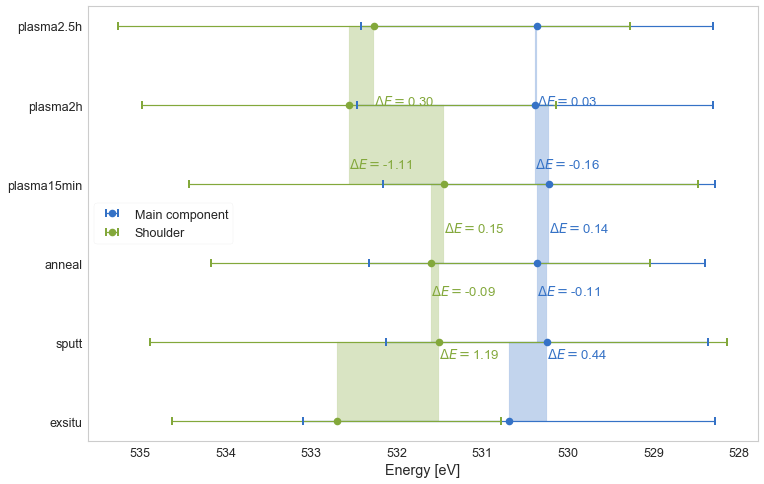

In [105]:
fitO_m = np.matrix(fitO)
names = [xp.name for xp in scaled_exps]
names[0] = scaled_exps[0].name
names, fitO
plt.figure(figsize=(12, 8))
colv = plt.errorbar(x = fitO_m[:,0], y = names, xerr=fitO_m[:,1], fmt='o', mew=2, label='Main component')[0].get_color()
colg = plt.errorbar(x = fitO_m[:,2], y = names, xerr=fitO_m[:,3], fmt='o', mew=2,label='Shoulder')[0].get_color()

dif = fitO_m [:-1,0] - fitO_m[1:,0]
for i, d in enumerate(dif) :
    plt.annotate(s = '$\Delta E = $%.2f'%d, xy=(fitO_m[i+1,0], 0.8 * (i+1)), color=colv)
    plt.fill_betweenx(y=(i, i+1), x1=fitO_m[i,0], x2=fitO_m[i+1,0], alpha=0.3, color=colv)
    

difg = fitO_m [:-1,2] - fitO_m[1:,2]
for i, d in enumerate(difg) :
    plt.annotate(s = '$\Delta E = $%.2f'%d, xy=(fitO_m[i+1,2], 0.8 * (i+1)), color=colg)
    plt.fill_betweenx(y=(i, i+1), x1=fitO_m[i,2], x2=fitO_m[i+1,2], alpha=0.3, color=colg)
cosmetics_plot()
plt.ylabel('')

# Quantify cleanness

In [ ]:
drop.plot_region('Cl_2p')

In [ ]:
drop.__init__(path = file_dropcast)
drop.gaussian_smooth('Cl_2p')
drop.subtract_shirley_bg('Cl_2p', maxit = 20)

# Sn

In [281]:
region = 'Sn3d5/2'
# experiments[0].dfx[region]

In [282]:
e0 = experiments[1].dfx[region].energy.head(1)
indrop = np.where(experiments[0].dfx[region].energy.values > e0.values)[0]
experiments[0].dfx[region] = experiments[0].dfx[region].drop(indrop)

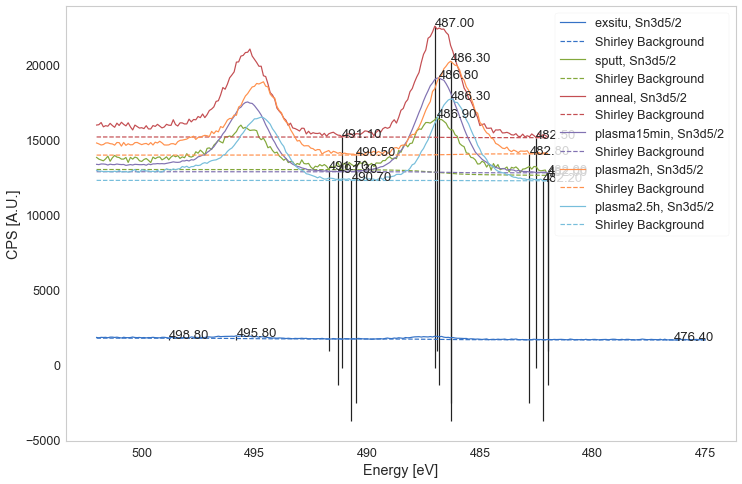

In [283]:
fig = plt.figure(figsize=(12, 8))
xp_bg = []
for xp in experiments:
    xp_bg.append(subtract_shirley_bg(xp, region, maxit=20, lb=xp.label))
cosmetics_plot()

## Compare areas

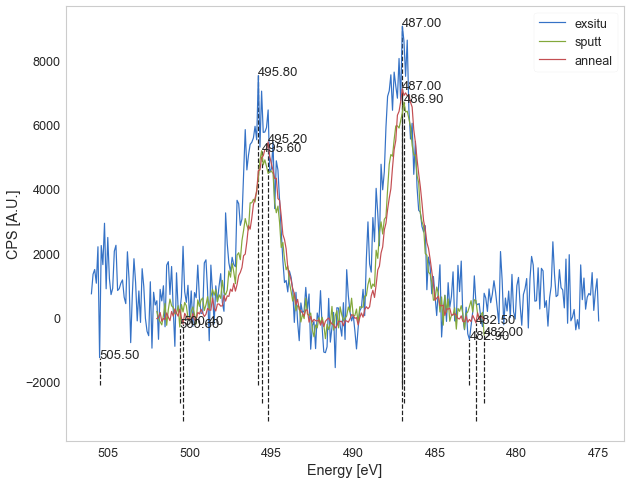

In [288]:
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(scaled_exps[:3]):
    ind.append(flexible_integration_limits(xp, region, doublePeak=-1))
# cosmetics_plot()

Text(0.5, 1.0, 'Sn 3d')

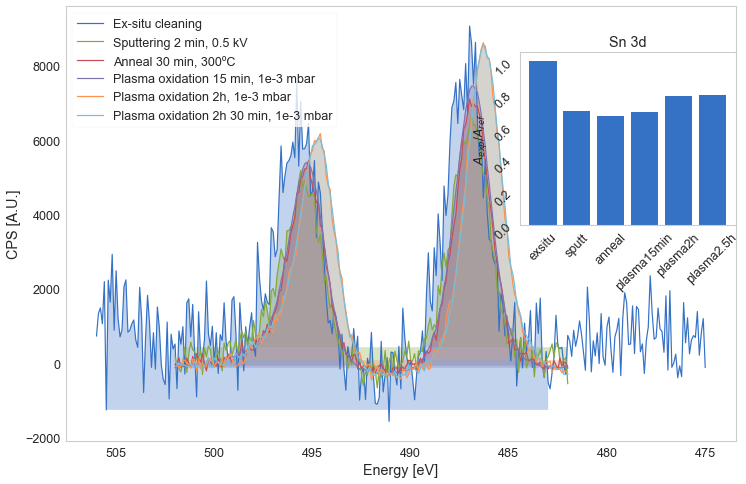

In [295]:
fig = plt.figure(figsize=(12, 8))
area_sn = []
area_rel = []
for xp in scaled_exps:
    area = compare_areas(xp_ref = scaled_exps[0], xp_sg = xp, region=region, lmidx = ind[0][2], rmidx=ind[0][3], lb=xp.label)
    area_sn.append(area[1])
    area_rel.append(area[0])
cosmetics_plot()
inset_rel_areas(area_rel, [xp.name for xp in scaled_exps])
plt.title('Sn 3d')

Text(0.5, 1.0, 'Sn 3d')

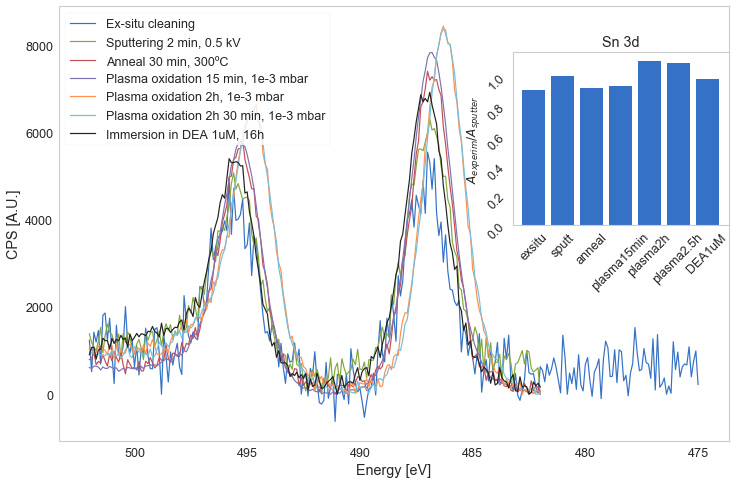

In [85]:
fig = plt.figure(figsize=(12, 8))
area_sn = []
area_rel = []
for xp in xp_bg:
    area = compare_areas(xp_ref = xp_bg[1], xp_sg = xp, region=region, lb=xp.label)
    area_sn.append(area[1])
    area_rel.append(area[0])
inset_rel_areas(area_rel)
plt.title('Sn 3d')

## Fits

In [524]:
def fit_double_voigt(xp : XPS_experiment, region : str, pars : list = None, bounds : list = None, sepPt : float = None,
                     lb : str = None, ax = None, flag_plot : bool = True, DEBUG : bool = False):
    """General method for fitting voigt model
    Input
    ----------
    xp : class XPS_experiment
        XPS data
    region : str
        core level name
    pars, bounds : list
        initial guess of the fit parameters and bounds. If unspecified, guessed automatically
    sepPt : float
        separation point in energy between the two peaks. If unspecified guessed automatically
    flag_plot, DEBUG : bool
        flags to plot intermediate and final fit results
    Returns
    -----------
    fitv : lmfit.model
        fit result to Voigt model
    """
    from lmfit.models import PseudoVoigtModel

    x = xp.dfx[region].dropna().energy
    y = xp.dfx[region].dropna().counts
    if sepPt == None: sepPt = find_separation_point(x, y)
        
    x1 = x[x<sepPt].values
    x2 = x[x>sepPt].values
    y1 = y[x<sepPt].values
    y2 = y[x>sepPt].values
    if ax == None : ax = plt.gca()
    
    col = plot_region(xp, region, lb=xp.name, ax=ax).get_color()

    mod1 = PseudoVoigtModel(prefix='v1_') 
    mod2 = PseudoVoigtModel(prefix='v2_') 
    if pars == None:
        pars1 = mod1.guess(y1, x=x1)
        pars1['v1_sigma'].set(value=1) # Usually guessed wrong anyway
        pars2 = mod2.guess(y2, x=x2)
        pars2['v2_sigma'].set(value=1) # Usually guessed wrong anyway

    mod = mod1 + mod2
    pars = mod.make_params()
    pars.update(pars1)
    pars.update(pars2)
    if DEBUG:
        fit1 = mod1.fit(y1, x=x1, params=pars1)
        fit2 = mod2.fit(y2, x=x2, params=pars2)
        ax.plot(x1, fit1.best_fit, '--', label='Fit first Voigt')
        ax.plot(x2, fit2.best_fit, '--', label='Fit second Voigt')
        
    fitv = mod.fit(y, pars, x=x)

    if flag_plot:
        ax.plot(x, fitv.best_fit, '--', label='Fit to double Voigt')
        ax.legend()
        
    return fitv

def find_separation_point(x : np.array, y : np.array, min_dist : int = 20, 
                          ax = None, DEBUG : bool = False) -> float:
    """Autolocate separation point between two peaks for double fitting"""
    peaks = [0, 0, 0]
    thres = 0.8
    while len(peaks) > 2:
        peaks = peakutils.indexes(y, thres=thres, min_dist=min_dist)
        thres += 0.01
    if DEBUG:
        if ax == None : ax = plt.gca()
        ax.plot(x[peaks], y[peaks], '*', ms=10)
        ax.axvline(x[peaks].sum()/2)
    return x[peaks].sum()/2

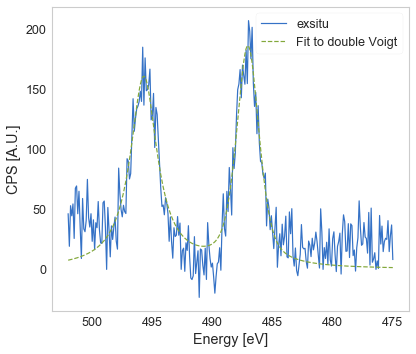

In [528]:
fit_double_voigt(xp_bg[0], region, sepPt = 490, DEBUG = False);

In [86]:
x, y = xp_bg[0].dfx[region].dropna().energy, xp_bg[0].dfx[region].dropna().counts
e0 = find_separation_point(x, y)

In [87]:
indrop = np.where(xp_bg[0].dfx[region].energy.values > e0)[0]
indrop, e0
# xp_bg[0].dfx[region].drop(indrop).reset_index(drop=True)
for xp in xp_bg:
    xp.dfx[region] = xp.dfx[region].drop(indrop)
    xp.dfx[region].reset_index(drop=True)

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'Sn 3d')

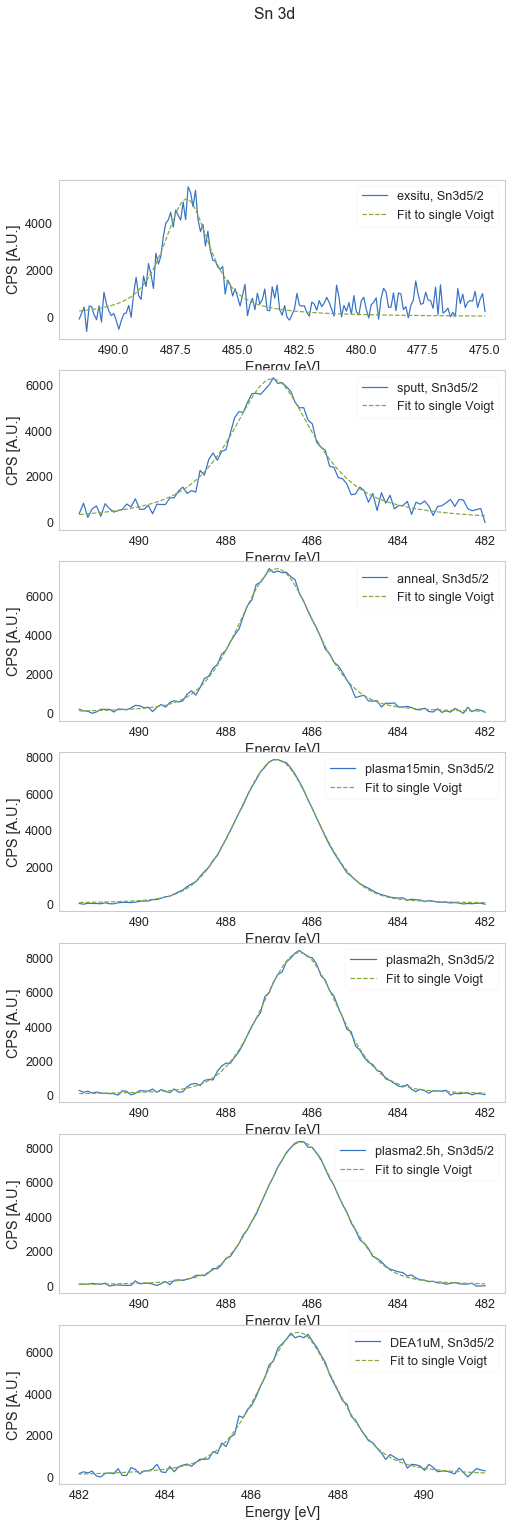

In [89]:
fitSn = []
from lmfit.models import PseudoVoigtModel
pars_v = [3500, 487, 1, 0.5]
mod = PseudoVoigtModel(prefix='v_')
pars = mod.make_params()
for k,p in zip(mod.param_names, pars_v):
    pars[k].set(value=p)

fig, ax = plt.subplots(len(experiments), figsize=(8,24))
for i, xp in enumerate(xp_bg):
    fitv = fit_voigt(xp, region, pars = pars, ax=ax[i])
    fitSn.append([fitv.params[p].value for p in ['v_center', 'v_fwhm']])
    
    cosmetics_plot(ax = ax[i])
plt.suptitle('Sn 3d')

## Results 

In [96]:
fitSn_m, names

(matrix([[487.062534  ,   2.25843034],
         [486.92818985,   2.37151444],
         [486.82669685,   2.12296328],
         [486.82833309,   2.16983678],
         [486.29343891,   2.13568327],
         [486.25239043,   2.12553605],
         [487.07247187,   2.19385115]]),
 ['exsitu',
  'sputt',
  'anneal',
  'plasma15min',
  'plasma2h',
  'plasma2.5h',
  'DEA1uM'])

No handles with labels found to put in legend.


Text(0, 0.5, '')

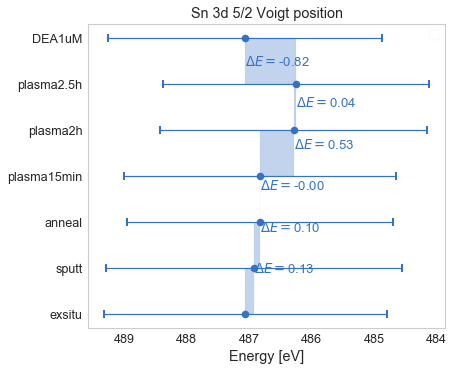

In [104]:
fitSn_m = np.matrix(fitSn)
names = [xp.name for xp in xp_bg[:]]
names[0] = xp_bg[0].name
names, fitSn
colv = plt.errorbar(x = fitSn_m[:,0], y = names, xerr=fitSn_m[:,1], fmt='o', mew=2, label='__nolabel__')[0].get_color()

dif = fitSn_m [:-1,0] - fitSn_m[1:,0]
for i, d in enumerate(dif) :
    plt.annotate(s = '$\Delta E = $%.2f'%d, xy=(fitSn_m[i+1,0], 0.9 * (i+1)), color=colv)
    plt.fill_betweenx(y=(i, i+1), x1=fitSn_m[i,0], x2=fitSn_m[i+1,0], alpha=0.3, color=colv)
    
cosmetics_plot()
plt.title('Sn 3d 5/2 Voigt position')
plt.ylabel('')

# In3d5/2

In [296]:
region = 'In3d5/2'

## Bg substract

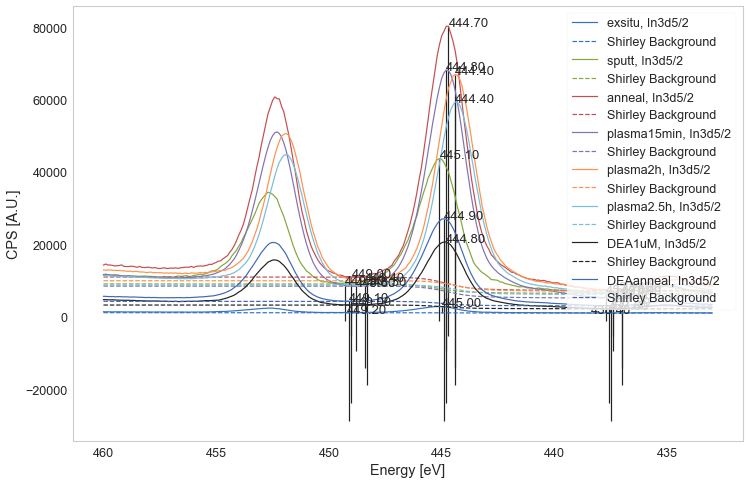

In [312]:
fig = plt.figure(figsize=(12, 8))
xp_bg = []
for xp in experiments:
    xp_bg.append(subtract_shirley_bg(xp, region, maxit=20, lb=xp.label))
cosmetics_plot()

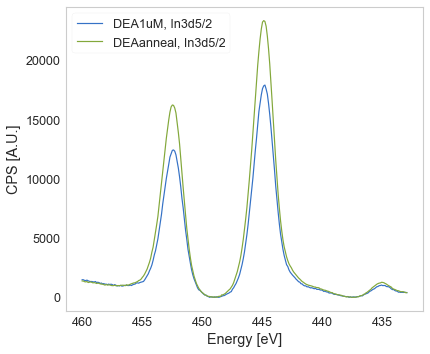

In [313]:
plot_region(xp_bg[-2], region)
plot_region(xp_bg[-1], region)
cosmetics_plot()

## Compare areas

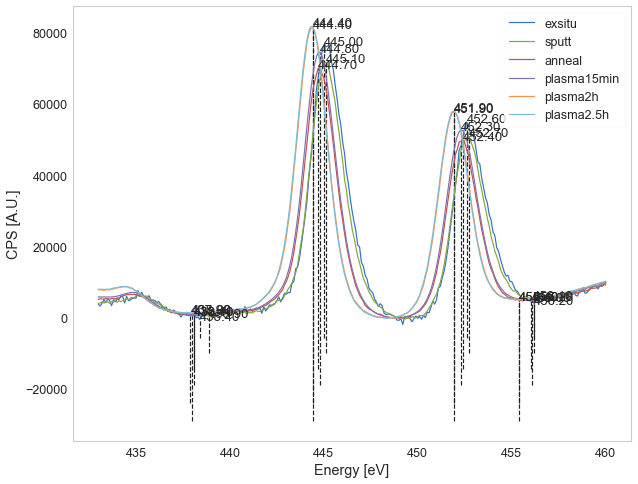

In [306]:
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(scaled_exps):
    ind.append(flexible_integration_limits(xp, region, doublePeak=-1))
# cosmetics_plot()

Text(0.5, 1.0, 'In 3d')

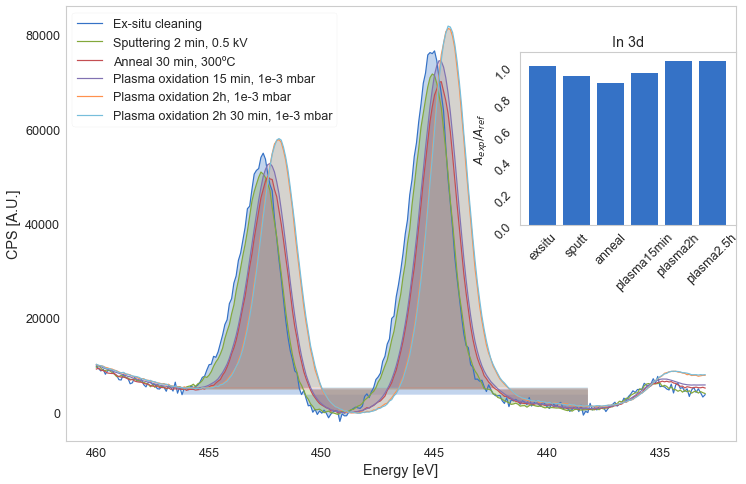

In [307]:
fig = plt.figure(figsize=(12, 8))
area_in = []
area_rel = []
for xp in scaled_exps:
    area = compare_areas(xp_ref = scaled_exps[0], xp_sg = xp, region=region, lmidx=ind[1][2], rmidx=ind[3][3], lb=xp.label)
    area_in.append(area[1])
    area_rel.append(area[0])
cosmetics_plot()
inset_rel_areas(area_rel, [xp.name for xp in scaled_exps])
plt.title('In 3d')

Text(0.5, 1.0, 'In 3d')

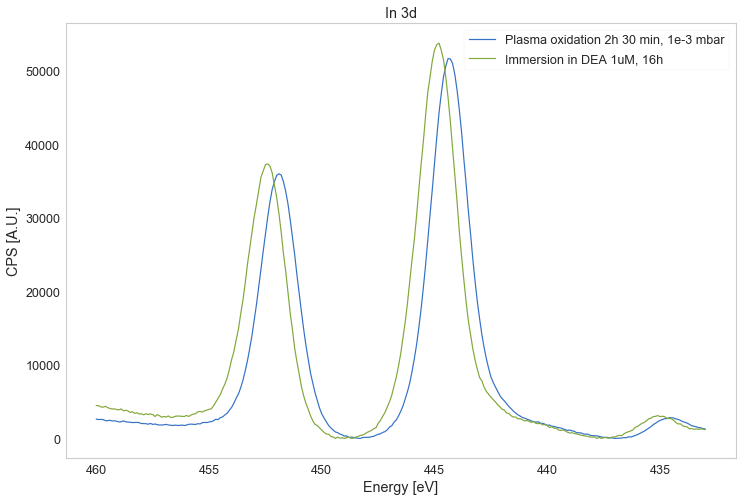

In [277]:
fig = plt.figure(figsize=(12, 8))
area_in = []
area_rel = []
for xp in xp_bg[-2:]:
    area = compare_areas(xp_ref = xp_bg[0], xp_sg = xp, region=region, lb=xp.label)
    area_in.append(area[1])
    area_rel.append(area[0])
# inset_rel_areas(area_rel)
cosmetics_plot()
plt.title('In 3d')

In [274]:
scale_dfx(xp_bg[-1], 3, inplace=True)

XPS_experiment(dfx=     Br3p3/2               C1s          In3d5/2            N1s           \
      energy     counts energy   counts  energy  counts energy   counts   
0      193.0  3706.3218  295.0  4368.78   460.0  4469.4  404.0  5198.25   
1      192.9  3721.4298  294.9  4379.94   459.9  4458.0  403.9  5121.00   
2      192.8  3708.1026  294.8  4395.18   459.8  4296.6  403.8  5166.75   
3      192.7  3719.2716  294.7  4377.78   459.7  4245.0  403.7  5219.25   
4      192.6  3735.0000  294.6  4371.72   459.6  4371.6  403.6  5142.00   
5      192.5  3726.3399  294.5  4356.84   459.5  4194.0  403.5  5209.50   
6      192.4  3719.2446  294.4  4398.48   459.4  4074.0  403.4  5241.75   
7      192.3  3746.7087  294.3  4360.68   459.3  4005.0  403.3  5262.75   
8      192.2  3720.1620  294.2  4409.76   459.2  4018.8  403.2  5176.50   
9      192.1  3734.7843  294.1  4397.10   459.1  3937.8  403.1  5154.75   
10     192.0  3734.3796  294.0  4422.06   459.0  3890.4  403.0  5219.25   
11    

## Fits

In [222]:
x, y = xp_bg[0].dfx[region].dropna().energy, xp_bg[0].dfx[region].dropna().counts
e0 = find_separation_point(x, y, min_dist=10, )
e0 = 449

In [223]:
indrop = np.where(xp_bg[0].dfx[region].energy.values > e0)[0]
indrop, e0
# xp_bg[0].dfx[region].drop(indrop).reset_index(drop=True)
for xp in xp_bg:
    xp.dfx[region] = xp.dfx[region].drop(indrop)
    xp.dfx[region].reset_index(drop=True)

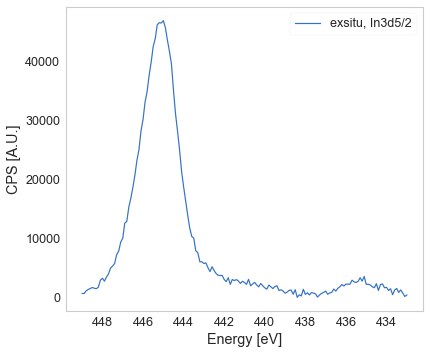

In [224]:
plot_region(xp_bg[0], region)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'In 3d')

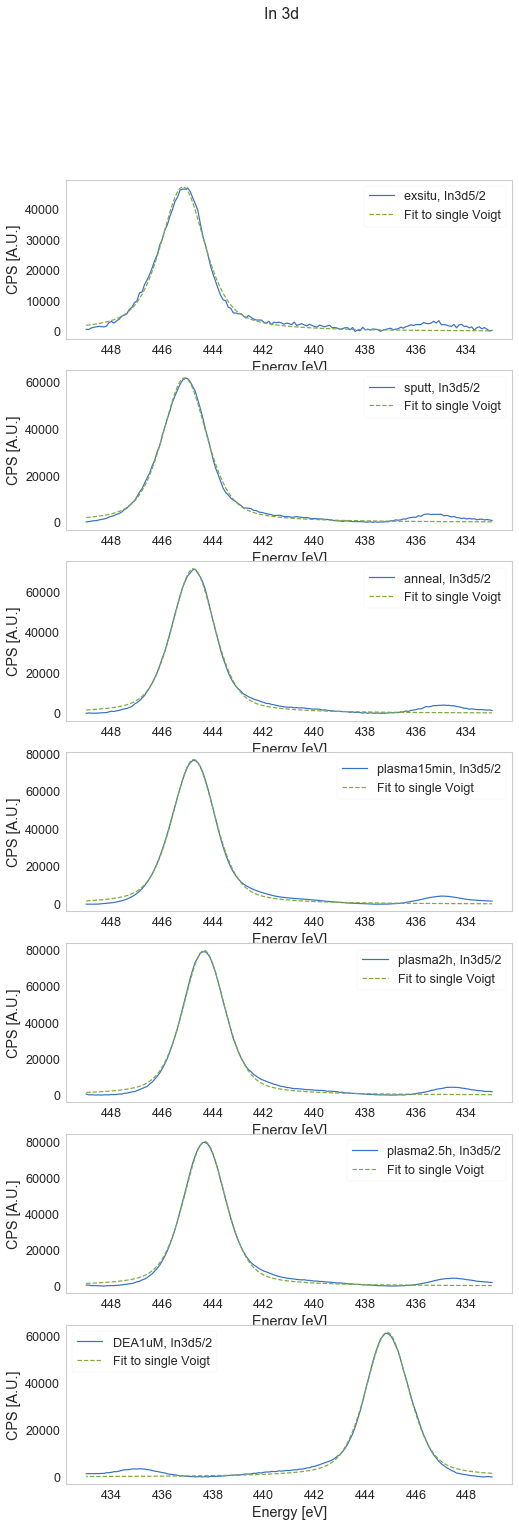

In [226]:
fitIn = []
from lmfit.models import PseudoVoigtModel
pars_v = [35000, 445, 1, 0.5]
mod = PseudoVoigtModel(prefix='v_')
pars = mod.make_params()
for k,p in zip(mod.param_names, pars_v):
    pars[k].set(value=p)

fig, ax = plt.subplots(len(experiments), figsize=(8,24))
for i, xp in enumerate(xp_bg):
    fitv = fit_voigt(xp, region, pars = pars, ax=ax[i])
    fitIn.append([fitv.params[p].value for p in ['v_center', 'v_fwhm']])
    
    cosmetics_plot(ax = ax[i])
plt.suptitle('In 3d')

## Results

No handles with labels found to put in legend.


Text(0, 0.5, '')

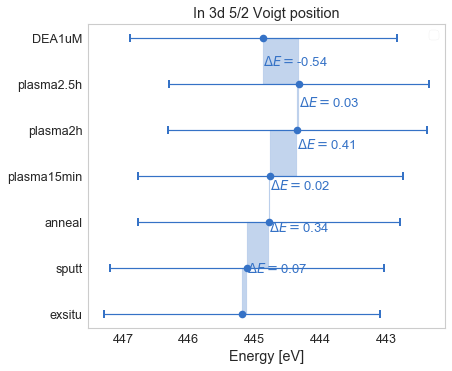

In [227]:
fitIn_m = np.matrix(fitIn)
names = [xp.name for xp in xp_bg[:]]
names[0] = xp_bg[0].name
names, fitIn
colv = plt.errorbar(x = fitIn_m[:,0], y = names, xerr=fitIn_m[:,1], fmt='o', mew=2, label='__nolabel__')[0].get_color()

dif = fitIn_m [:-1,0] - fitIn_m[1:,0]
for i, d in enumerate(dif) :
    plt.annotate(s = '$\Delta E = $%.2f'%d, xy=(fitIn_m[i+1,0], 0.9 * (i+1)), color=colv)
    plt.fill_betweenx(y=(i, i+1), x1=fitIn_m[i,0], x2=fitIn_m[i+1,0], alpha=0.3, color=colv)
    
cosmetics_plot()
plt.title('In 3d 5/2 Voigt position')
plt.ylabel('')

# Br 

In [366]:
region = 'Br3p3/2'

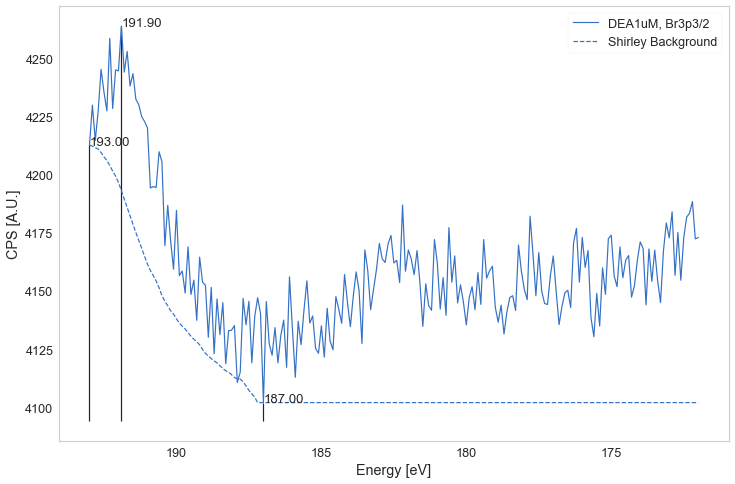

In [368]:
fig = plt.figure(figsize=(12, 8))
xp_bg = subtract_shirley_bg(experiments[-1], region, maxit=200, lb=xp.label)
cosmetics_plot()

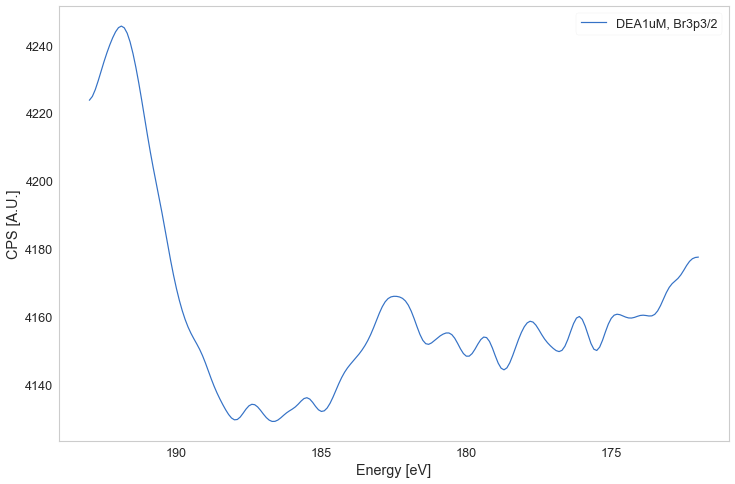

In [379]:
fig = plt.figure(figsize=(12, 8))
xp_smooth = gaussian_smooth(experiments[-1], region)
plot_region(xp_smooth, region)
# cosmetics_plot()

# N 

In [294]:
region = 'N1s'

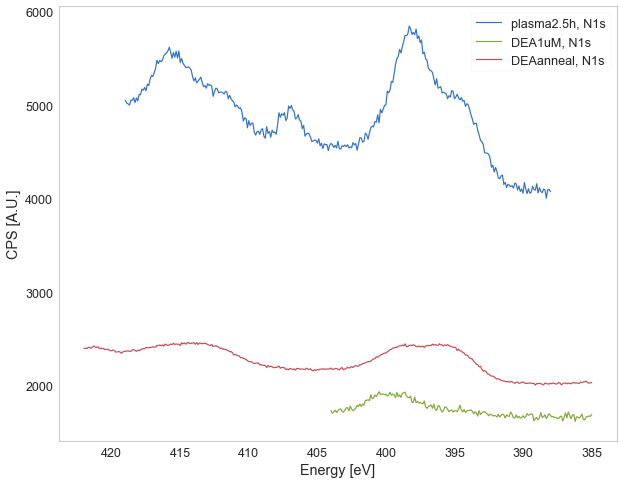

In [303]:
plt.figure(figsize=(10,8))
for xp in experiments[-3:]:
    plot_region(xp, region)

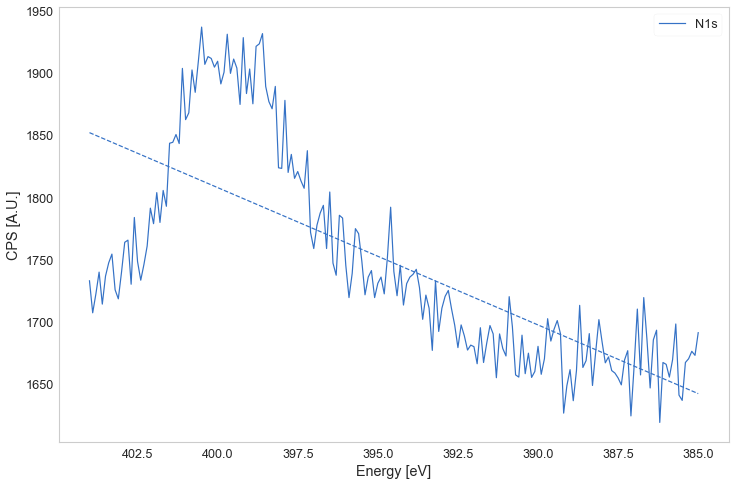

In [291]:
fig = plt.figure(figsize=(12, 8))
xp_bg = []
for xp in experiments[-1:]:
    xp_bg.append(subtract_linear_bg(xp, region, lb=xp.label))
# cosmetics_plot()

## Compare areas

Text(0.5, 1.0, 'In 3d')

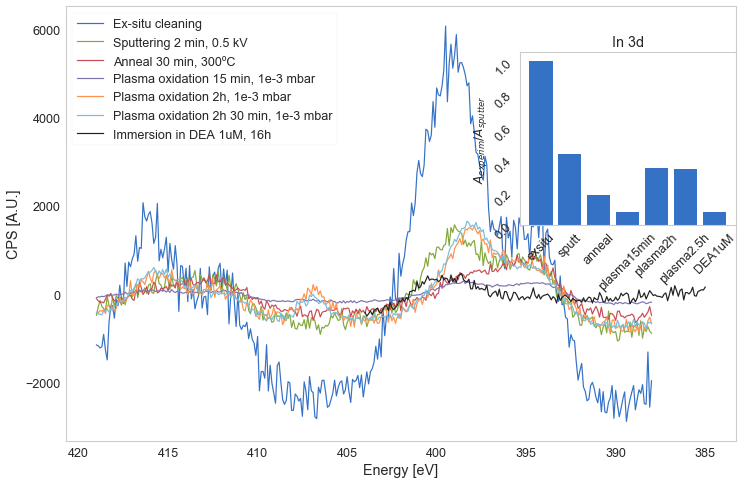

In [236]:
fig = plt.figure(figsize=(12, 8))
area_in = []
area_rel = []
for xp in xp_bg:
    area = compare_areas(xp_ref = xp_bg[0], xp_sg = xp, region=region, lb=xp.label)
    area_in.append(area[1])
    area_rel.append(area[0])
inset_rel_areas(area_rel)
plt.title('In 3d')

# Stoichiometry

In [405]:
area_o

[5585.8439476660205,
 72969.85006922607,
 61326.713448369504,
 60319.045830594674,
 84024.98341989773,
 89044.14405038807,
 67651.47595766971]

In [228]:
asf = dict({'C' : 0.296, 'O' : 0.711, 'N' : 0.477, 'In' : 4.359, 'Sn' : 4.725, 'Br' : 1.053})
print('Relative abundance | C/O | In/Sn | In/O | In/C | ')
for i in range(7):
    print('| ', experiments[i].name, '| %.1f | %.1f | %.1f | %.1f |' %(area_c[i]*asf['O'] / (area_o[i]*asf['C'])  , 
          area_in[i]*asf['Sn'] / (area_sn[i]*asf['In']), 
          area_in[i]*asf['O'] / (area_o[i]*asf['In']) , 
          area_in[i]*asf['C'] / (area_c[i]*asf['In'])) )

Relative abundance | C/O | In/Sn | In/O | In/C | 
|  exsitu | 1.7 | 7.3 | 0.3 | 0.2 |
|  sputt | 1.1 | 7.9 | 0.7 | 0.6 |
|  anneal | 0.2 | 9.2 | 0.8 | 3.5 |
|  plasma15min | 0.1 | 9.9 | 0.9 | 7.1 |
|  plasma2h | 0.1 | 8.5 | 0.7 | 4.8 |
|  plasma2.5h | 0.1 | 8.7 | 0.6 | 9.0 |
|  DEA1uM | 0.7 | 7.8 | 0.7 | 1.0 |


In [419]:
asf = dict({'C' : 0.296, 'O' : 0.711, 'N' : 0.477, 'In' : 4.359, 'Sn' : 4.725, 'Br' : 1.053})
print('Relative abundance | C/O | In/Sn | In/O | In/C | ')
for i in range(7):
    print('| ', experiments[i].name, '| %.1f | %.1f | %.1f | %.1f |' %(area_c[i]*asf['O'] / (area_o[i]*asf['C'])  , 
          area_in[i]*asf['Sn'] / (area_sn[i]*asf['In']), 
          area_in[i]*asf['O'] / (area_o[i]*asf['In']) , 
          area_in[i]*asf['C'] / (area_c[i]*asf['In'])) )

Relative abundance | C/O | In/Sn | In/O | In/C | 
|  exsitu | 1.7 | 7.3 | 0.3 | 0.2 |
|  sputt | 1.1 | 7.9 | 0.7 | 0.6 |
|  anneal | 0.2 | 9.2 | 0.8 | 3.5 |
|  plasma15min | 0.1 | 9.9 | 0.9 | 7.1 |
|  plasma2h | 0.1 | 8.5 | 0.7 | 4.8 |
|  plasma2.5h | 0.1 | 8.7 | 0.6 | 9.0 |
|  DEA1uM | 0.7 | 7.8 | 0.7 | 1.0 |


# Dropcasting test

## Import data

In [5]:
path = '/Users/pabloherrero/sabat/xps_spectra/2019_10_[2,3]*Au_crystal*/*.xy'
files = glob.glob(path, recursive=True)
files

['/Users/pabloherrero/sabat/xps_spectra/2019_10_31_Au_crystal_sputter_2kev/20191031_FBI_Ba_Au(788)_2ndSputter_2kev.xy',
 '/Users/pabloherrero/sabat/xps_spectra/2019_10_29_Au_crystal_sputter_1500ev/20191029_Au(788)_sputter_1500ev.xy',
 '/Users/pabloherrero/sabat/xps_spectra/2019_10_28_FBI_dropcast_Au_crystal/20191028_FBI_dropcast_1mM_Au(788).xy',
 '/Users/pabloherrero/sabat/xps_spectra/2019_10_30_Au_crystal_sputter_2kev/20191030_FBI_Ba_Au(788)_sputter_2kev.xy',
 '/Users/pabloherrero/sabat/xps_spectra/2019_10_28_Au_crystal_clean/20191028_Au(788)_clean.xy']

In [17]:
names = ['sput2h', 'sput15min', 'dropcast', 'sput1h', 'clean', ]
experiments = [xps_data_import(path=f, name=n) for f,n in zip(files, names)]
experiments[0].name

'sput2h'

## Plot all overviews

In [7]:
region = 'overview'

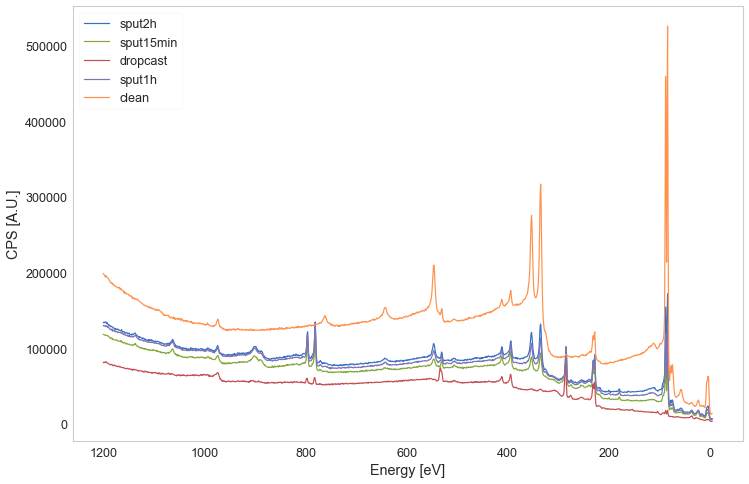

In [8]:
fig = plt.figure(figsize=(12, 8))
for xp in experiments:
    plot_region(xp, region, lb=xp.name)

## Scale to reference

In [9]:
file_clean = path + '2019_10_28_Au_crystal_clean/20191028_Au(788)_clean.xy'
file_dropcast = path + '2019_10_28_FBI_dropcast_Au_crystal/20191028_FBI_dropcast_1mM_Au(788).xy'
dfclean = XPSImport(file_clean).import_xps_df()
dfdrop = XPSImport(file_dropcast).import_xps_df()
dfclean = reverse_energy_scale(dfclean, file_clean)

NameError: name 'path' is not defined

In [ ]:
dfclean

In [ ]:
dfdrop

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dfclean.overview.energy, dfclean.overview.counts, '-', label='Overview clean Au(788)')
plt.plot(dfdrop.overview.energy, dfdrop.overview.counts, '-', label='Overview Dropcast FBI-Ba++ 1 mM')

find_and_plot_peaks(df=dfdrop.overview, thres=0.9)
cosmetics_plot()

In [ ]:
xref = np.array(dfclean.overview.energy[ (dfclean.overview.energy > 200) & (dfclean.overview.energy < 250)])
yref = np.array(dfclean.overview.counts[ (dfclean.overview.energy > 200) & (dfclean.overview.energy < 250)])

plt.plot(xref, yref, label='Reference (clean) Mo peak')

x = np.array(dfdrop.overview.energy[ (dfdrop.overview.energy > 200) & (dfdrop.overview.energy < 250)])
y = np.array(dfdrop.overview.counts[ (dfdrop.overview.energy > 200) & (dfdrop.overview.energy < 250)])
plt.plot(x, y, label='Dropcasting Mo')

cosmetics_plot()
ind = peakutils.indexes(y, thres=0.9)[0]
ind2 = peakutils.indexes(yref, thres=0.9)[0]
scale_factor = yref[ind2] / y[ind]
scale_factor

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(dfclean.overview.energy, dfclean.overview.counts, '-', label='Overview reference clean Au(788) ')
plt.plot(dfdrop.overview.energy, dfdrop.overview.counts*scale_factor, '-', label='Dropcasting FBI (scaled up)')
cosmetics_plot()

In [10]:
dfdrop = scale_df(dfdrop, scale_factor=scale_factor)

NameError: name 'scale_df' is not defined

## Find Barium abundance

In [10]:
region = 'Ba_3d'

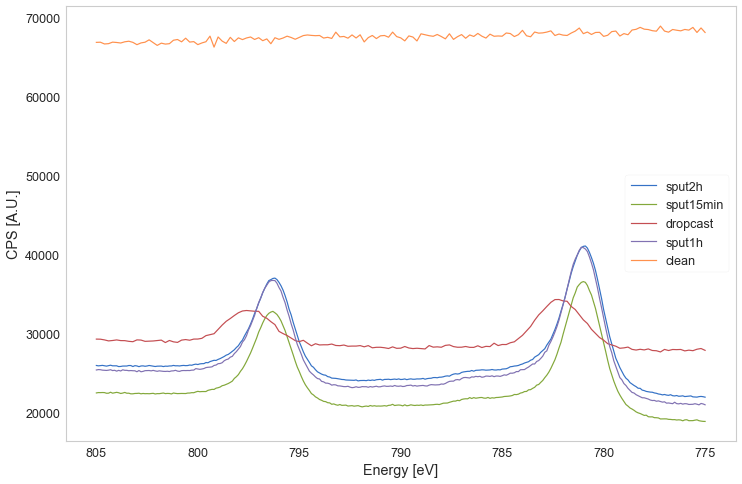

In [18]:
fig = plt.figure(figsize=(12, 8))
for xp in experiments:
    plot_region(xp, region, lb=xp.name)

Text(0.5, 1.0, 'Ba 3d region')

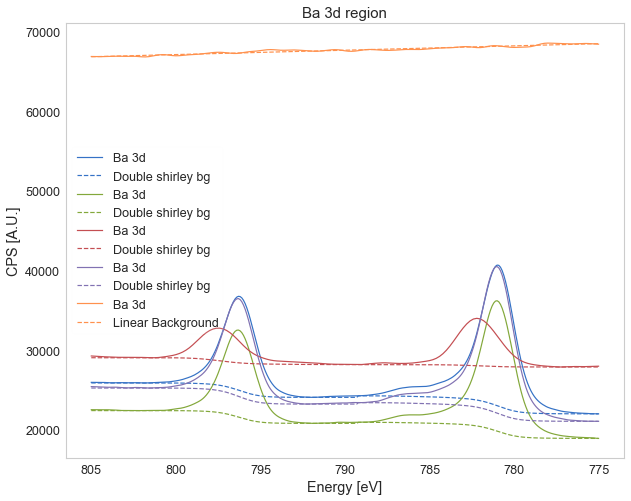

In [19]:
fig = plt.figure(figsize=(10, 8))

for j, xp in enumerate(experiments):
    xp_smooth = gaussian_smooth(xp, region)
    if xp.name == 'clean':
        xp_bg = subtract_linear_bg(xp_smooth, region)
    else:
        xp_bg = subtract_double_shirley(xp_smooth, region, 789.2)

cosmetics_plot()
plt.legend(loc='center left', framealpha=0.1)
plt.title('Ba 3d region', fontsize = 15)

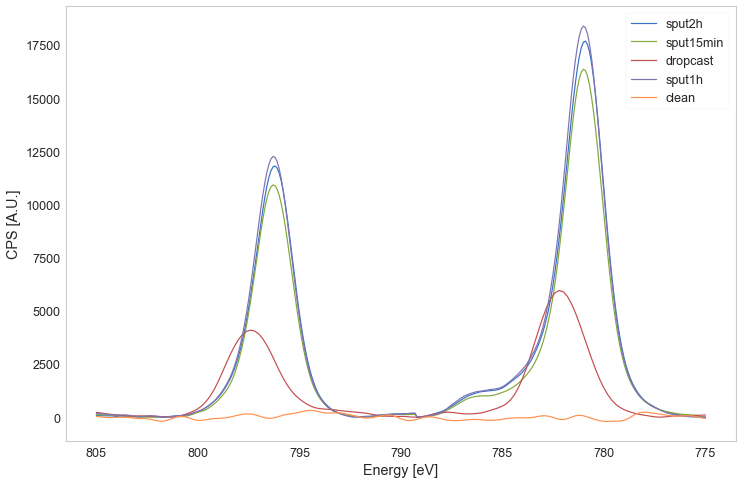

In [20]:
fig = plt.figure(figsize=(12, 8))
for xp in experiments:
    plot_region(xp, region, lb=xp.name)

## Compare areas

In [50]:
def compare_areas(xp_ref : XPS_experiment, xp_sg : XPS_experiment, region : str, 
                  lb : str = None,  ax = None):
    """Returns absolute and relative area in a region xp_sg and w.r.t. xp_ref"""
    y_ref = xp_ref.dfx[region].dropna().counts
    y_sg = xp_sg.dfx[region].dropna().counts

    if ax == None: ax = plt.gca()
    x = xp_sg.dfx[region].dropna().energy.values
    step = x[0] - x[1]
    area = np.trapz(y_sg, dx = step)
    area_rel = area / np.trapz(y_ref, dx = step)

    if lb == None: lb = xp_sg.name
    ax.plot(x, y_sg, '-', label=lb + '\nArea: %.0f' %area)
    cosmetics_plot()
    return area_rel, area

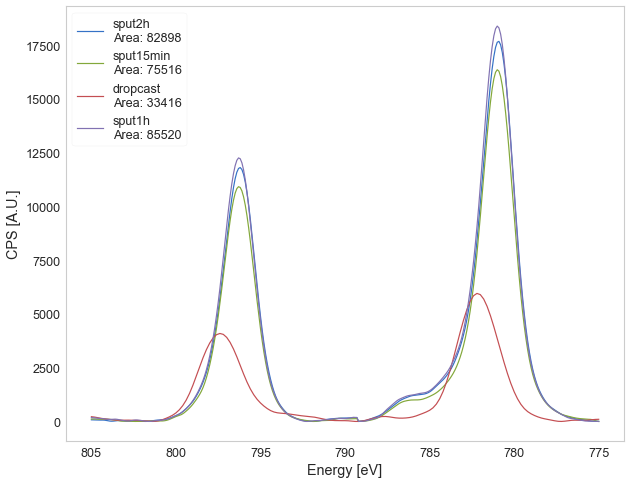

In [52]:
[xp.name for xp in experiments]
area_ba = []
plt.figure(figsize=(10, 8))
for j, xp in enumerate(experiments[:-1]):
    area_ba.append(compare_areas(experiments[-1], xp, region))
cosmetics_plot()

In [53]:
area_ba

[(53019.8482020702, 82897.5670621168),
 (48298.573280027005, 75515.76161112564),
 (10686.176823079599, 33416.09189270709),
 (54697.14541138805, 85520.0539723509)]

Text(0.5, 1.0, 'Sputter effect')

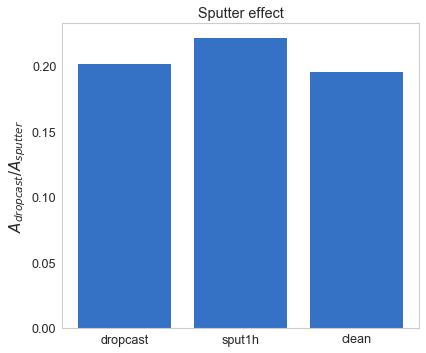

In [59]:
sput_eff = [area_ba[0][0]/area_ba[2][0], area_ba[1][0]/area_ba[2][0], area_ba[3][0]/area_ba[2][0]]
# plt.bar([s.replace('Sputter','') for s in lb[2:]], [1/x for x in sput_eff])
plt.bar([xp.name for xp in experiments[2:]], [1/x for x in sput_eff])
plt.ylabel('$A_{dropcast}/A_{sputter}$', fontsize=15)
plt.title('Sputter effect')

## Voigt fit

In [60]:
[xp.name for xp in experiments]

['sput2h', 'sput15min', 'dropcast', 'sput1h', 'clean']

11.572191639016078


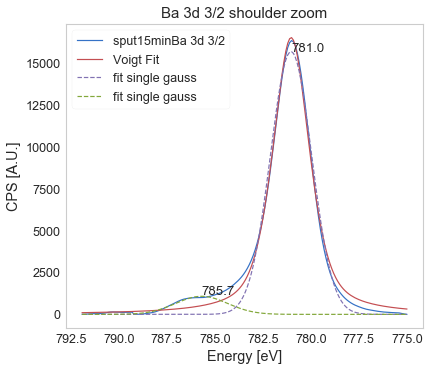

In [350]:
sput1 = experiments[1]
clean = experiments[4]
x = sput1.dfx.Ba_3d.dropna().energy.values

y = sput1.dfx.Ba_3d.dropna().counts.values

from lmfit.models import PseudoVoigtModel, GaussianModel

y = y[ x < 792]
x = np.array(x[ x < 792])
plt.plot(x, y, '-b', label=sput1.name + 'Ba 3d 3/2')

mod = PseudoVoigtModel(prefix='v_')
pars = mod.guess(y, x=x)
pars['v_sigma'].set(value=1)
fitv = mod.fit(y, pars, x=x)
# print(fitv.fit_report(min_correl=0.25))
fitpar = [ fitv.best_values[i] for i in fitv.best_values]
plt.plot(x, fitv.best_fit, '-r', label='Voigt Fit')

step = x[-2] - x[-1]
fitv, covv = curve_fit(gauss, x, y, p0 = [15000, 789, 2])
yfitv = gauss(x, *fitv)
plt.plot(x, yfitv, 'm--', label='fit single gauss')

area_big = np.trapz(yfitv, dx = step)

yp = y[x > 785]
xp = x[x > 785]
fitg, covv = curve_fit(gauss, xp, yp, p0 = [1000, 787, 1])
yfitg = gauss(x, *fitg)
plt.plot(x, yfitg, 'g--', label='fit single gauss')
area_small = np.trapz(yfitg, dx = step)

print(area_big/ area_small)
plt.text(s='%.1f'%fitv[1], x=fitv[1], y=fitv[0]*1.0)
plt.text(s='%.1f'%fitg[1], x=fitg[1], y=fitg[0]*1.1)
plt.title('Ba 3d 3/2 shoulder zoom', fontsize = 15)
plt.legend()
cosmetics_plot()

In [403]:
def compute_area(fit, prefix):
    sigma = fit.best_values[prefix+'sigma']
    amp = fit.best_values[prefix+'amplitude']
    return amp * np.sqrt(np.pi/sigma)

def fit_voigt(xp : XPS_experiment, region : str, pars : list = None, bounds : list = None, ax = None, flag_plot : bool = True):
    """General method for fitting voigt model
    Input
    ----------
    xp : class XPS_experiment
        XPS data
    region : str
        core level name
    pars, bounds : list
        initial guess of the fit parameters and bounds. If unspecified, guessed automatically
    Returns
    -----------
    fitv : lmfit.model
        fit result to Voigt model
    """
    from lmfit.models import PseudoVoigtModel, GaussianModel
    
    x = xp.dfx[region].dropna().energy
    y = xp.dfx[region].dropna().counts
    if ax == None: ax = plt.gca()
    ax.plot(x, y, '-b', label='Data')
    
    mod = PseudoVoigtModel(prefix='v_')
    if pars == None:
        pars = mod.guess(y, x=x)
        pars['v_sigma'].set(value=1) # Usually guessed wrong anyway
    
    fitv = mod.fit(y, pars, x=x)
    
    if flag_plot:
        ax.plot(x, fitv.best_fit, '--', label='Fit to single Voigt')
        ax.legend()
    return fitv

def add_gauss_shoulder(xp : XPS_experiment, region : str, par_g : list, bounds_g: list, 
                       fitv = None, Ng : int = 1, ax = None, flag_plot : bool = True):
    """Add gaussian shoulder to fit
    Input
    ----------
    xp : class XPS_experiment
        XPS data
    region : str
        core level name
    par_g, bounds_g : list
        initial guess of the gauss fit parameters and bounds.
    Returns
    -----------
    fitvg : lmfit.model
        fit result to Voigt + Gaussian model
    """
    from lmfit.models import PseudoVoigtModel, GaussianModel
    
    x = xp.dfx[region].dropna().energy
    y = xp.dfx[region].dropna().counts
    if ax == None : ax = plt.gca()
    ax.plot(x, y, '-b', label='Data')
    
    gauss2 = GaussianModel(prefix='g'+str(Ng)+'_')
    pars = fitv.params
    pars.update(gauss2.make_params())

    for k,p,b in zip(gauss2.param_names, par_g, bounds_g):
        pars[k].set(value=p, min=b[0], max=b[1])
    mod2 = fitv.model + gauss2

    fitvg = mod2.fit(y, pars, x=x)
    # print(fitvg.fit_report(min_correl=.5))
    if flag_plot:
        comps = fitvg.eval_components(x=x)
#         a1, a0 = [compute_area(fitvg, prefix) for prefix in ['g_', 'v_']]

        ax.plot(x, fitvg.best_fit, '-r', label = 'best fit')
#         ax.plot(x, comps['v_'], 'g--', label = 'voigt component @ %.2f \nArea ref. '%fitvg.best_values['v_center'])
        ax.plot(x, comps['g'+str(Ng)+'_'], 'y--', label = '1st gauss component @ %.2f \nArea =  '%(fitvg.best_values['g'+str(Ng)+'_center']))#, a1/a0))
        ax.legend()
    cosmetics_plot()
    return fitvg

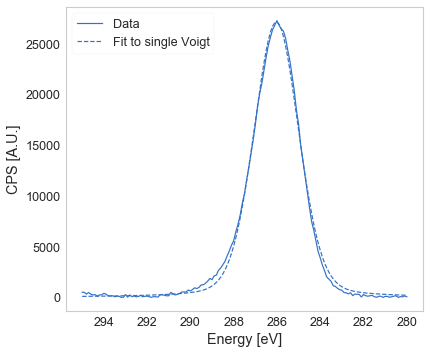

In [401]:
sput1 = experiments[2]
sput1 = subtract_shirley_bg(sput1, 'C_1s')
plt.clf()
# fit_voigt_gauss(sput1.dfx['C_1s'], par_g=[287, 1, 2e4], bounds_g=[(286, 292), (0.8, 1.8), (1e3, 5e3)], ax = ax);
fitv = fit_voigt(sput1, 'C_1s')#, par_g=[287, 1, 2e4], bounds_g=[(286, 292), (0.8, 1.8), (1e3, 5e3)], ax = ax);
cosmetics_plot()

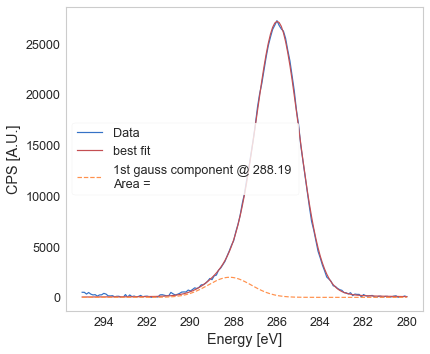

In [404]:
par_g=[2e4, 287, 1]
bounds_g=[ (1e3, 5e3), (286, 292), (0.8, 1.8)]
fitvg = add_gauss_shoulder(xp = sput1, region='C_1s', par_g=par_g, bounds_g=bounds_g, fitv=fitv)

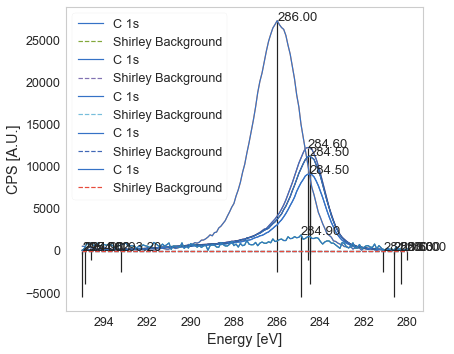

In [405]:
region = 'C_1s'
for i, xp in enumerate(experiments):
    xp = subtract_shirley_bg(xp, region, )

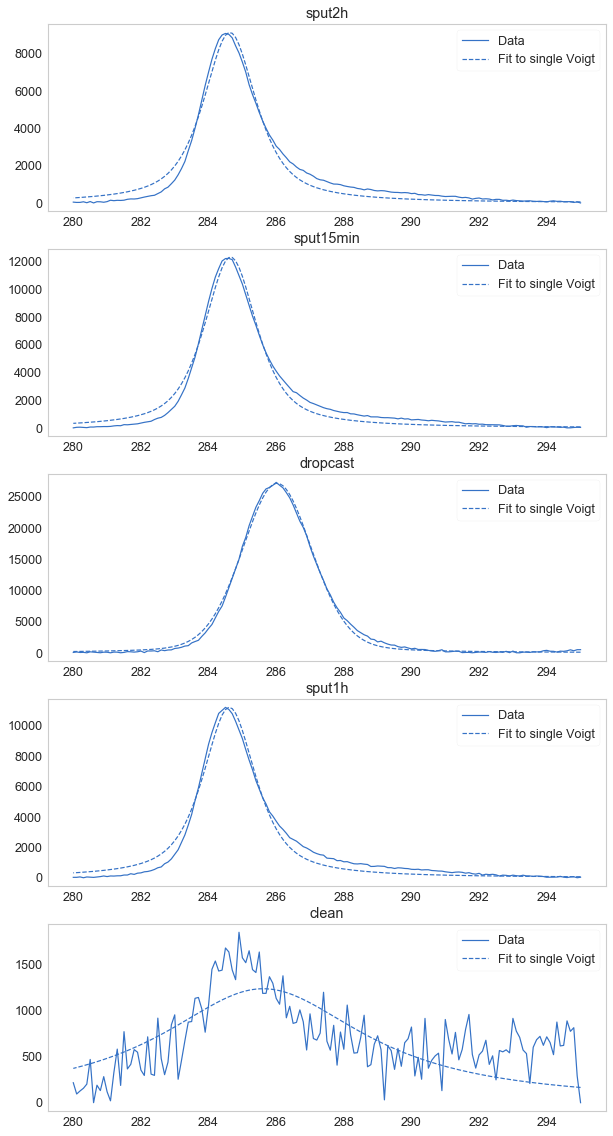

In [377]:
fig, ax = plt.subplots(len(experiments), figsize=(10, 20))
for i, xp in enumerate(experiments):
    fit_voigt(xp, region, ax=ax[i])
    ax[i].set_title(xp.name)

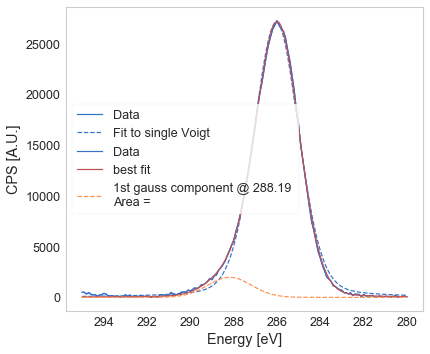

In [407]:
fitv = fit_voigt(sput1, 'C_1s')
fitvg = add_gauss_shoulder(xp = sput1, region='C_1s', par_g=par_g, bounds_g=bounds_g, fitv=fitv)

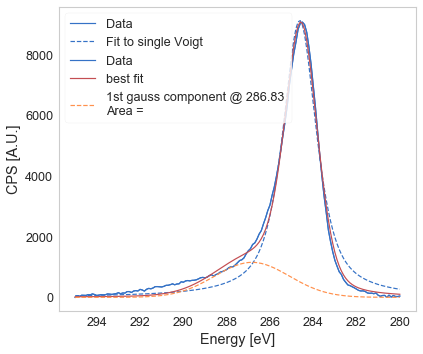

In [415]:
sput2 = experiments[0]
fitv = fit_voigt(sput2, 'C_1s')
par_g=[2e4, 287, 1]
bounds_g=[ (1e3, 5e3), (286, 292), (0.8, 1.8)]
fitvg = add_gauss_shoulder(xp = sput2, region='C_1s', par_g=par_g, bounds_g=bounds_g, fitv=fitv, flag_plot=True)

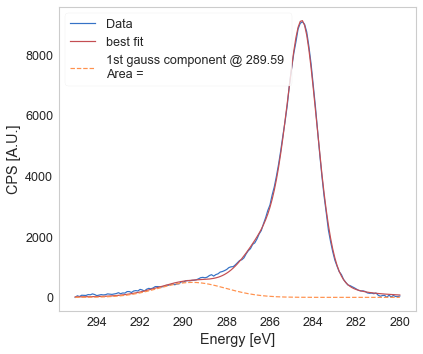

In [416]:
par_g=[1e4, 290, 1.2]
bounds_g=[ (500, 2e3), (289, 292), (0.8, 2.5)]
fitvgg = add_gauss_shoulder(xp = sput2, region='C_1s', par_g=par_g, bounds_g=bounds_g, fitv=fitvg, Ng=2)

In [ ]:
x[ind]

### The background from Ba 3d 3/2 was not subtracted -> Separate peaks

In [12]:
dfBa3d_32 = dfdrop.Ba_3d [ dfdrop.Ba_3d.energy > 790 ]
y32 = subtract_shirley_bg(dfBa3d_32)

NameError: name 'dfdrop' is not defined

In [ ]:
dfref_32 = dfclean.Ba_3d [ dfclean.Ba_3d.energy > 790 ]
y32bg = subtract_linear_bg(dfref_32)

In [13]:
from scipy.ndimage.filters import gaussian_filter1d 
x = dfBa3d_32.energy.values

y32 = gaussian_filter1d(y32, sigma = 2)
y32bg = gaussian_filter1d(y32bg, sigma = 2)

step = x[0] - x[1]
area_ratio = np.trapz(y32, dx = step) / np.trapz(y32bg, dx = -step)
print(area_ratio)

plt.plot(x, y32, label='Dropcasting test')
plt.plot(x, y32bg, label='Reference intensity, Au clean')

plt.title('Ba 3d 3/2')

cosmetics_plot()

NameError: name 'dfBa3d_32' is not defined

## Compare to C abundance

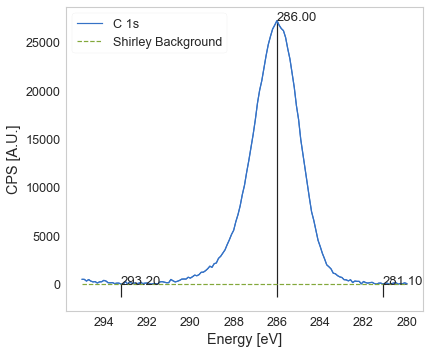

In [17]:
yC = subtract_shirley_bg(experiments[0], 'C_1s', maxit=20)

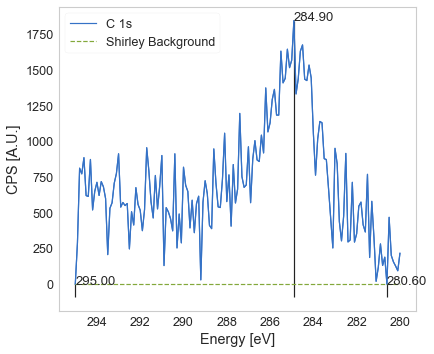

In [18]:
yCref = subtract_shirley_bg(experiments[1], 'C_1s', maxit=20)

7.051082058539533


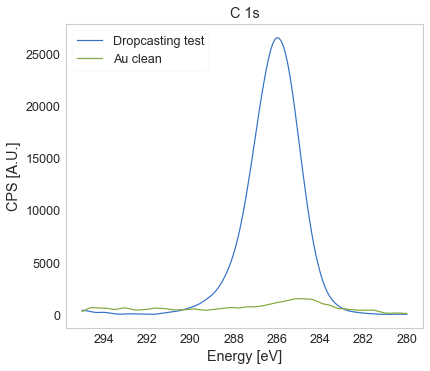

In [19]:
from scipy.ndimage.filters import gaussian_filter1d 
x = experiments[0].dfx.C_1s.dropna().energy.values
# yCref = dfclean.C_1s.dropna().counts.values - np.average(yCref)
yC = gaussian_filter1d(yC.dfx.C_1s.dropna().counts, sigma = 2)
yCref = gaussian_filter1d(yCref.dfx.C_1s.dropna().counts, sigma = 2)

step = x[0] - x[1]
area_ratio = np.trapz(yC, dx = step) / np.trapz(yCref, dx = step)
print(area_ratio)

plt.plot(x, yC, label='Dropcasting test')
plt.plot(x, yCref, label='Au clean')
plt.title('C 1s')

cosmetics_plot()

# Arrange Class Region analysis

In [15]:
class XPSana(XPSImport):
    """Analysis methods for XPS spectra"""
    def __init__(self, path):
        super().__init__(path)
        self.df = XPSImport.import_xps_df(self)
    
    def cosmetics_plot(self, ax = None):
        if ax == None: ax = plt.gca()
        ax.invert_xaxis()
        ax.legend()
        ax.set_xlabel('Energy [eV]')
        ax.set_ylabel('CPS [A.U.]')

    def plot_region(self, region : str, lb : str = None):
        
        if lb == None: lb = region.replace('_', ' ')
            
        p1 = plt.plot(self.df[region].energy, self.df[region].counts, label=lb)
        self.cosmetics_plot()
        return p1[0]
        
    def scale_df(self, scale_factor):
    
        names = list(self.df.columns.levels[0])
        dfnew = pd.DataFrame()

        frames = []
        for n in names:
            x = self.df[n].counts.apply(lambda c : c * scale_factor)
            frames.append( pd.DataFrame([self.df[n].energy, x]).T )
        dfnew = pd.concat(frames, axis=1)

        mi = pd.MultiIndex.from_product([names, np.array(['energy', 'counts'])])
        mi.to_frame()
        dfnew.columns = mi
        self.df = dfnew
        
    def reverse_energy_scale(self):
        """Transform energy scale from kinetic to binding"""
        def excitation_energy_metadata(name : str):
            """Find the excitation energy for a region in XPS '.xy' file
            Parameters:
            path : str 
                Absolute path to file to search into
            name : str
                Name of the region with underscores"""

            with open(self.path) as infile:
                for i, line in enumerate(infile):
                    if name.replace('_', ' ') in line:
                        chunk = infile.readlines(800)
        #                 print(chunk)
                        for li in chunk:
                            if '# Excitation Energy: ' in li:
                                hv = li[21:-1]
                                return float(hv)
                print('Region %s not found' %name)

        names = list(self.df.columns.levels[0])
        dfnew = pd.DataFrame()

        frames = []

        for n in names:    # Loop over regions
            hv = excitation_energy_metadata(n)    # Find excitation energy from file data
            x = self.df[n].energy.dropna().apply(lambda E : hv - E)  # Subtract hv from KE to yield binding energy
            frames.append( pd.DataFrame([x, self.df[n].counts]).T )
        dfnew = pd.concat(frames, axis=1)

        mi = pd.MultiIndex.from_product([names, np.array(['energy', 'counts'])])
        mi.to_frame()
        dfnew.columns = mi
        self.df = dfnew

    def check_arrays(self, x, y):
        # Make sure we've been passed arrays and not lists.
        x = np.array(x)
        y = np.array(y)
        # Sanity check: Do we actually have data to process here?
        if not (x.any() and y.any()):
            print ("specs.shirley_calculate: One of the arrays x or y is empty. Returning zero background.")
            #return zeros(x.shape)

        # Next ensure the energy values are *decreasing* in the array,
        # if not, reverse them.
        if x[0] < x[-1]:
            is_reversed = True
            x = x[::-1]
            y = y[::-1]
            return x, y, is_reversed
        else:
            is_reversed = False
            return x, y, is_reversed

    def find_integration_limits(self, x, y, flag_plot = False, region : str = None):
        # Locate the biggest peak.
        maxidx = abs(y - np.max(y)).argmin()

        # It's possible that maxidx will be 0 or -1. If that is the case,
        # we can't use this algorithm, we return a zero background.
        if maxidx == 0 or maxidx >= len(y) - 1:
            print ("specs.shirley_calculate: Boundaries too high for algorithm: returning a zero background.")

        # Locate the minima either side of maxidx.
        lmidx = abs(y[0:maxidx] - np.min(y[0:maxidx])).argmin()
        rmidx = abs(y[maxidx:] - np.min(y[maxidx:])).argmin() + maxidx

        if flag_plot:
            plt.plot(x, y, 'b-', label=region.replace('_', ' '))
            ybase = plt.ylim()[0]
            ind = [maxidx, lmidx, rmidx]
            for i in ind:
                plt.vlines(x = x[i], ymin=ybase, ymax=y[i], color='k')
                plt.text(s= '%.2f'%x[i], x = x[i], y = y[i])
            
        return lmidx, rmidx

    def shirley_loop(self, x, y,
                     lmidx : int = None,
                     rmidx : int = None,
                     maxit : int = 10, tol : float = 1e-5,
                     DEBUG : bool = False):
        # Initial value of the background shape B. The total background S = yr + B,
        # and B is equal to (yl - yr) below lmidx and initially zero above.

        x, y, is_reversed = self.check_arrays(x, y)
        
        if (lmidx == None) or (rmidx == None):
            lmidx, rmidx = self.find_integration_limits(x, y, flag_plot=False)
        xl, yl = x[lmidx], y[lmidx]
        xr, yr = x[rmidx], y[rmidx]
        
        B = np.zeros(x.shape)
        B[:lmidx] = yl - yr
        Bnew = B.copy()
        it = 0
        while it < maxit:
            if DEBUG:
                print ("Shirley iteration: %i" %it)

            # Calculate new k = (yl - yr) / (int_(xl)^(xr) J(x') - yr - B(x') dx')
            ksum = np.trapz( + B[lmidx:rmidx - 1] + yr - y[lmidx:rmidx - 1] , x=x[lmidx:rmidx - 1])
            k = (yl - yr) / ksum

            # Calculate new B
            ysum = 0
            for i in range(lmidx, rmidx):
                ysum = np.trapz( B[i:rmidx - 1] + yr - y[i:rmidx - 1] , x=x[i:rmidx - 1])
                Bnew[i] = k * ysum

            # If Bnew is close to B, exit.
            if np.linalg.norm(Bnew-B) < tol:
                B = Bnew.copy()
                break
            else:
                B = Bnew.copy()
            it += 1

        if it >= maxit:
            print("specs.shirley_calculate: Max iterations exceeded before convergence.")
        if is_reversed:
            return ((yr + B)[::-1])
        else:
            return (yr + B)

    def subtract_shirley_bg(self, region, maxit : int = 10, lb : str = None):
        """Plot region and shirley background. Decorator for shirley_loop function"""
        x, y = self.df[region].dropna().energy.values, self.df[region].dropna().counts.values

        if lb == None : lb = region.replace('_', ' ')
        p1 = plt.plot(x, y, label=lb)
        col = p1[0].get_color()
        
        self.find_integration_limits(x, y, flag_plot=True, region = region)
        ybg = self.shirley_loop(x, y, maxit = maxit)
        
        plt.plot(x, ybg, '--', color = col, label='Shirley Background')
        self.cosmetics_plot()
        
        dfnew = pd.DataFrame({'energy' : self.df[region].energy.dropna(), 'counts' : y - ybg})
        self.df[region] = dfnew

    def subtract_double_shirley(self, region : str, xlim : float, maxit : int = 10):
        """Shirley bg subtraction for double peak"""
        x = self.df[region].dropna().energy
        y = self.df[region].dropna().counts
        plt.plot(x, y, label=region.replace('_', ' '))
        
        y1 = y[ x > xlim ]
        x1 = x[ x > xlim ]
        y2 = y[ x <= xlim ]
        x2 = x[ x <= xlim ]

        ybg1 = self.shirley_loop(x1, y1, maxit = maxit)
        ybg2 = self.shirley_loop(x2, y2, maxit = maxit)

        plt.plot(x, np.append(ybg1, ybg2), label='Double shirley bg')
        y = np.append( y1 - ybg1, y2 - ybg2)
        self.cosmetics_plot()

        dfnew = pd.DataFrame({'energy' : x, 'counts' : y})
        self.df[region] = dfnew

    def subtract_linear_bg (self, region, lb : str = None) -> np.array:
        """Fit background to line and subtract from data"""

        from scipy import stats, polyval
        x = self.df[region].dropna().energy.values
        y = self.df[region].dropna().counts.values
        if lb == None : lb = region.replace('_', ' ')
        p1 = plt.plot(x, y, label=lb)
        col = p1[0].get_color()
        
        slope, intercept, r, p_val, std_err = stats.linregress(x, y)
        ybg = polyval([slope, intercept], x);
        plt.plot(x, ybg, '--', color=col, label='Linear Background')
        self.cosmetics_plot()
        
        dfnew = pd.DataFrame({'energy' : self.df[region].energy.dropna(), 'counts' : y - ybg})
        self.df[region] = dfnew
        
    def gaussian_smooth(self, region, sigma : int = 2) -> pd.DataFrame:
        from scipy.ndimage.filters import gaussian_filter1d 

        y = gaussian_filter1d(self.df[region].dropna().counts.values, sigma = 2)
        dfnew = pd.DataFrame({'energy' : self.df[region].energy.dropna(), 'counts' : y})
        self.df[region] = dfnew
        
    from scipy.optimize import curve_fit
    def gauss(self, x, *p):
        A, mu, sigma = p
        return A *  np.exp(-( x-mu )**2 / (2.*sigma**2))

    def double_gauss(self, x, *p):
        return self.gauss(x, *p[:3]) + self.gauss(x, *p[3:])

    def fit_double_gauss(self, region : str, thres0 : float = 0.5):
        """Fit to double gauss, estimate loc and scale from peak finding"""
        
        p1 = self.plot_region(region, lb=region)
        col = p1.get_color()
        x = self.df[region].dropna().energy.values
        y = self.df[region].dropna().counts.values
        def compute_p0_peaks(x, y, thres0) -> list:
            peaks = peakutils.indexes(y, thres = thres0, min_dist=10)
            while len(peaks) > 2:
                thres0 += 0.05
                peaks = peakutils.indexes(y, thres = thres0, min_dist=10)
            while len(peaks) < 2:
                thres0 -= 0.05
                peaks = peakutils.indexes(y, thres = thres0, min_dist=10)
            p0 = [y[peaks[0]], x[peaks[0]], 2, y[peaks[1]], x[peaks[1]], 2]
            return p0

        p0 = compute_p0_peaks(x, y, thres0)
        fit, cov = curve_fit(self.double_gauss, xdata = x , ydata= y, p0=p0)

        plt.plot(x, self.double_gauss(x, *fit), '--', color=col, label='Double gauss fit')

        plt.text(s='%.1f'%fit[1], x=fit[1], y=fit[0]*1.1)
        plt.text(s='%.1f'%fit[4], x=fit[4], y=fit[3]*1.05)
        yl = plt.ylim()
        plt.ylim(yl[0], yl[1]*1.5)
        self.cosmetics_plot()

        return fit[1], fit[4]
    
    def fit_gauss(self, region : str, thres0 : float = 0.7):
        """Fit to gauss, estimate loc and scale from peak finding"""
        
        p1 = self.plot_region(region, lb=region)
        col = p1.get_color()
        x = self.df[region].dropna().energy.values
        y = self.df[region].dropna().counts.values
        
        def compute_p0_peaks(x, y, thres0) -> list:
            peaks = peakutils.indexes(y, thres = thres0, min_dist=10)
            while len(peaks) > 1:
                thres0 += 0.05
                peaks = peakutils.indexes(y, thres = thres0, min_dist=10)
            while len(peaks) < 1:
                thres0 -= 0.05
                peaks = peakutils.indexes(y, thres = thres0, min_dist=10)
            p0 = [y[peaks[0]], x[peaks[0]], 2]
            return p0

        p0 = compute_p0_peaks(x, y, thres0)
        fit, cov = curve_fit(self.gauss, x, y, p0=p0)

        plt.plot(x, self.gauss(x, *fit), '--', color=col, label='Gauss fit')

        plt.text(s='%.1f'%fit[1], x=fit[1], y=fit[0]*1.1)
        yl = plt.ylim()
        plt.ylim(yl[0], yl[1]*1.5)
        self.cosmetics_plot()

        return fit

NameError: name 'XPSImport' is not defined

### Test it

In [16]:
drop = XPSana(path = file_dropcast)#, region = 'C_1s')
drop.plot_region('Cl_2p')

drop.gaussian_smooth('Cl_2p', sigma=3)
drop.plot_region('Cl_2p', 'Gaussian smooth')
plt.gca().invert_xaxis()

NameError: name 'XPSana' is not defined

In [ ]:
drop.subtract_linear_bg('Cl_2p')